**Prediksi Harga Sewa Properti Airbnb di Seattle Menggunakan Pendekatan CRISP-DM**

- **Nama:** Mochammad Syahrul Abidin
- **Email:** mc332d5y1816@student.devacademy.id
- **ID Dicoding:** MC332D5Y1816

---

### CRISP-DM
Proses CRISP-DM melibatkan langkah-langkah berikut:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dl = pd.read_csv('/content/drive/MyDrive/CODING CAMP 2025/Project Machine Learning Terapan/Prediksi Harga Sewa Properti Airbnb di Seattle Menggunakan Pendekatan CRISP-DM/listings.csv')
dr = pd.read_csv('/content/drive/MyDrive/CODING CAMP 2025/Project Machine Learning Terapan/Prediksi Harga Sewa Properti Airbnb di Seattle Menggunakan Pendekatan CRISP-DM/reviews.csv')
dc = pd.read_csv('/content/drive/MyDrive/CODING CAMP 2025/Project Machine Learning Terapan/Prediksi Harga Sewa Properti Airbnb di Seattle Menggunakan Pendekatan CRISP-DM/calendar.csv')

---

___

### 1. Business Understanding

Dalam tinjauan awal terhadap skema data, berikut beberapa pertanyaan yang ingin dijawab:
1. Apa saja area dengan peringkat tertinggi untuk memesan akomodasi di Seattle?
2. Apa saja lingkungan dengan revenue tertinggi di Seattle?
3. Apa saja fasilitas yang paling banyak disediakan oleh tuan rumah di Seattle?
4. Skor mana yang paling penting untuk ratings keseluruhan?(Linear Regression)
5. Apakah tuan rumah dengan ratings lebih tinggi secara keseluruhan menghasilkan revenue lebih tinggi?(Linear Regression)
6. Fasilitas, karakteristik perumahan, dan faktor apa yang berkontribusi positif terhadap revenue?(Linear Regression)
7. Fasilitas, karakteristik perumahan, dan faktor apa yang berkontribusi positif terhadap ratings?(Analisis Linear Regression)

___

### 2. Data Understanding

Data Airbnb yang disediakan adalah untuk kota Seattle, Washington selama periode 2016-2017:
1. **Listings.csv** berisi rincian properti dan harga
2. **Reviews.csv** berisi ulasan setelah menginap di rumah
3. **Calendar.csv** berisi harga untuk daftar pada hari-hari tertentu

In [4]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Ada 92 fitur dengan tipe campuran. Beberapa fitur tidak sesuai dengan tipe data yang diharapkan dan akan memerlukan pembersihan dan persiapan.

In [5]:
dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


Ada 6 fitur dengan tipe campuran. Fitur-fitur memenuhi tipe data yang diharapkan, tetapi beberapa transformasi mungkin diperlukan untuk data string.

In [6]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Ada 4 fitur dengan tipe campuran. Beberapa fitur seperti harga tidak sesuai dengan tipe data yang diharapkan dan akan memerlukan pembersihan dan persiapan.

In [7]:
dl.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

Berikut adalah statistik ringkasan dari fitur numerik.

In [8]:
pd.set_option('display.max_rows', None)
dl.describe().T
pd.set_option('display.max_rows', 10)

Terdapat fitur yang memiliki tipe data yang tidak terduga atau ambigu dalam konten di Listings untuk mendapatkan pemahaman yang lengkap:

In [9]:
investigate_features = [
'host_response_time',
'host_response_rate',
'host_acceptance_rate',
'host_is_superhost',
'host_verifications',
'host_has_profile_pic',
'host_identity_verified',
'neighbourhood_cleansed',
'neighbourhood_group_cleansed',
'zipcode',
'market',
'smart_location',
'is_location_exact',
'price',
'weekly_price',
'monthly_price',
'security_deposit',
'cleaning_fee',
'extra_people',
'calendar_updated',
'has_availability',
'calendar_last_scraped',
'requires_license',
'license',
'instant_bookable',
'cancellation_policy',
'require_guest_profile_picture',
'require_guest_phone_verification'
]

In [10]:
for feature in investigate_features:
    print('{}:'.format(feature))
    print(dl[feature].unique()[:10])
    print('')

host_response_time:
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']

host_response_rate:
['96%' '98%' '67%' nan '100%' '71%' '97%' '60%' '50%' '31%']

host_acceptance_rate:
['100%' nan '0%']

host_is_superhost:
['f' 't' nan]

host_verifications:
["['email', 'phone', 'reviews', 'kba']"
 "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']"
 "['email', 'phone', 'google', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'reviews', 'kba']"
 "['email', 'phone', 'facebook', 'google', 'linkedin', 'reviews', 'jumio']"
 "['email', 'phone', 'facebook', 'linkedin', 'reviews', 'kba']"
 "['email', 'phone', 'linkedin', 'reviews', 'jumio']"
 "['email', 'reviews', 'kba']"
 "['email', 'phone', 'linkedin', 'reviews', 'kba']"]

host_has_profile_pic:
['t' 'f' nan]

host_identity_verified:
['t' 'f' nan]

neighbourhood_cleansed:
['West Queen Anne' 'Adams' 'West Woodland' 'East Queen Anne' 'Wallingford'
 'N

**Fitur yang bukan numerik tetapi seharusnya numerik termasuk:**
1. 'price'
2. 'weekly_price'
3. 'monthly_price'
4. 'security_deposit'
5. 'cleaning_fee'
6. 'extra_people'
7. 'host_response_rate'
8. 'host_acceptance_rate'
9. 'zipcode' *(keep as non-numeric categorical)*

Semua ini mewakili jumlah dolar atau persentase dan telah diformat sebagai string dengan tanda baca '$', ',', dan '%'. Kode pos secara khusus mengandung kesalahan melalui penambahan karakter pelarian dan seharusnya berupa bilangan bulat biasa.

**Fitur yang non-numerik dan merupakan boolean kategorikal termasuk:**
1. 'host_has_profile_pic'
2. 'host_identity_verified'
3. 'is_location_exact'
4. 'has_availability'
5. 'requires_license'
6. 'instant_bookable'
7. 'require_guest_profile_picture'
8. 'require_guest_phone_verification'

Ini mewakili data kategorikal boolean benar atau salah. Ini memerlukan one-hot encoding.

**Fitur yang non-numerik dan kategorikal serta mungkin menunjukkan ordinalitas termasuk:**
1. 'host_response_time
2. 'host_is_superhost'
3. 'calendar_updated'
4. 'cancellation_policy'

**Fitur yang sudah dibersihkan sebelumnya dan kategorikal non-numerik:**
1. 'neighbourhood_cleansed'
2. 'neighbourhood_group_cleansed'

In [11]:
dr.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

Data dalam Ulasan adalah ortodoks tanpa perlu konversi.

In [12]:
dc.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

**Identifikasi Missing Values**

In [13]:
def find_missing(data):
    '''
    INPUT:
    data - DataFrame containing values.
    OUTPUT:
    DataFrame - DataFrame containing missing values count & percentage by feature, only if missing
    '''
    missing_pc = [sum(data[x].isna() == True) / data.shape[0] for x in data.columns]
    missing = [sum(data[x].isna() == True) for x in data.columns]
    out = pd.DataFrame([data.columns, missing, missing_pc]).T
    out.columns = ['Feature', 'Missing', 'Missing %']
    out = out[out['Missing'] > 0]
    return out

In [14]:
missing = find_missing(data=dl)
display('Listings - % Missing')
pd.set_option('display.max_rows', None)
display(missing)
pd.set_option('display.max_rows', 10)

'Listings - % Missing'

Feature Missing Missing %
5                       summary     177  0.046359
6                         space     569  0.149031
9         neighborhood_overview    1032  0.270299
10                        notes    1606  0.420639
11                      transit     934  0.244631
12                thumbnail_url     320  0.083814
13                   medium_url     320  0.083814
15               xl_picture_url     320  0.083814
18                    host_name       2  0.000524
19                   host_since       2  0.000524
20                host_location       8  0.002095
21                   host_about     859  0.224987
22           host_response_time     523  0.136983
23           host_response_rate     523  0.136983
24         host_acceptance_rate     773  0.202462
25            host_is_superhost       2  0.000524
26           host_thumbnail_url       2  0.000524
27             host_picture_url       2  0.000524
28           host_neighbourhood     300  0.078575
29          host_listings_count       2  0.000524
30    host_total_listings_count       2  0.000524
31           host_verifications       2  0.000524
32         host_has_profile_pic       2  0.000524
33       host_identity_verified       2  0.000524
35                neighbourhood     416  0.108958
40                      zipcode       7  0.001833
48                property_type       1  0.000262
51                    bathrooms      16  0.004191
52                     bedrooms       6  0.001572
53                         beds       1  0.000262
56                  square_feet    3721  0.974594
58                 weekly_price    1809  0.473808
59                monthly_price    2301  0.602672
60             security_deposit    1952  0.511262
61                 cleaning_fee    1030  0.269775
74                 first_review     627  0.164222
75                  last_review     627  0.164222
76         review_scores_rating     647   0.16946
77       review_scores_accuracy     658  0.172342
78    review_scores_cleanliness     653  0.171032
79        review_scores_checkin     658  0.172342
80  review_scores_communication     651  0.170508
81       review_scores_location     655  0.171556
82          review_scores_value     656  0.171818
84                      license    3818       1.0
91            reviews_per_month     627  0.164222

In [15]:
missing = find_missing(data=dr)
display('Reviews - % Missing')
display(missing)

'Reviews - % Missing'

Feature Missing Missing %
5  comments      18  0.000212

In [16]:
missing = find_missing(data=dc)
display('Calendar - % Missing')
display(missing)

'Calendar - % Missing'

Feature Missing Missing %
3   price  459028   0.32939

Sehubungan dengan pertanyaan-pertanyaan yang telah disebutkan sebelumnya yang ingin saya teliti secara rinci di bagian sebelumnya, saya merasa fitur-fitur yang menarik bagi saya adalah sebagai berikut:
- Listings
    1. listing_id
    2. host_response_rate
    3. host_acceptance_rate
    4. host_is_superhost
    5. host_total_listings_count
    6. host_identity_verified
    7. neighbourhood_cleansed
    8. neighbourhood_group_cleansed
    9. latitude
    10. longitude
    11.  property_type
    12.  room_type
    13.  accommodates
    14.  bathrooms
    15.  bedrooms
    16.  beds
    17.  amenities
    18.  price
    19.  security_deposit
    20.  cleaning_fee
    21.  extra_people
    22.  minimum_nights
    23.  number_of_reviews
    24.  review_scores_rating
    25.  review_scores_accuracy
    26.  review_scores_cleanliness
    27.  review_scores_checkin
    28.  review_scores_communication
    29.  review_scores_location
    30.  review_scores_value
    31.  instant_bookable
    32.  cancellation_policy
    33.  reviews_per_month
- Reviews
    1. listing_id
    2. id
- Calendar
    1. n/a

___

### 3. Data Preparation

Untuk variabel-variabel yang memerlukan penyesuaian dan imputasi nilai yang hilang, saya mengelompokkannya berdasarkan tipe data dan melakukan operasi untuk mempersiapkan sebelum pemodelan.

In [17]:
  data = dl.copy()

In [18]:
data.rename(columns={'id': 'listing_id'}, inplace=True)

**Fitur Numeric**

Mengonversi tipe data string menjadi persentase dalam interval [0, 1].

In [19]:
data['host_response_rate'] = data['host_response_rate'].str.replace('[% ]', '', regex=True).astype(float)
data['host_response_rate'] = data['host_response_rate'] * 0.01


In [20]:
data['host_acceptance_rate'].unique()

array(['100%', nan, '0%'], dtype=object)

In [21]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('[% ]', '', regex=True).astype(float)
data['host_acceptance_rate'] = data['host_acceptance_rate'] * 0.01

Mengubah boolean kategorikal menjadi dummy biner.

In [22]:
data['host_is_superhost'].replace('t', 1, inplace=True)
data['host_is_superhost'].replace('f', 0, inplace=True)
sum(data['host_is_superhost'].isna()==True)

<ipython-input-22-7ac961243aba>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['host_is_superhost'].replace('t', 1, inplace=True)
<ipython-input-22-7ac961243aba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

2

In [23]:
data['host_identity_verified'].replace('t', 1, inplace=True)
data['host_identity_verified'].replace('f', 0, inplace=True)
sum(data['host_identity_verified'].isna()==True)

<ipython-input-23-99737aa59038>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['host_identity_verified'].replace('t', 1, inplace=True)
<ipython-input-23-99737aa59038>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

2

Menghapus tanda baca *'$', ','* dari variabel monetary dan menyimpannya sebagai float.

In [24]:
data['price'] = data['price'].str.replace('[$, ]', '', regex=True).astype(float)
data['security_deposit'] = data['security_deposit'].str.replace('[$, ]', '', regex=True).astype(float)
data['cleaning_fee'] = data['cleaning_fee'].str.replace('[$, ]', '', regex=True).astype(float)
data['extra_people'] = data['extra_people'].str.replace('[$, ]', '', regex=True).astype(float)

In [25]:
data['instant_bookable'].replace('t', 1, inplace=True)
data['instant_bookable'].replace('f', 0, inplace=True)
sum(data['instant_bookable'].isna()==True)

<ipython-input-25-a428eca6b096>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['instant_bookable'].replace('t', 1, inplace=True)
<ipython-input-25-a428eca6b096>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

0

**Fitur Categorical**

Mengidentifikasi apakah fitur kategorikal memiliki missing values.

In [26]:
data['neighbourhood_cleansed'].unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [27]:
data['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [28]:
data['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [29]:
data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [30]:
data['cancellation_policy'].unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

####**Mengisi Missing Values**

Untuk nilai yang hilang, menggunakan lingkungan yang menunjukkan area granular di mana properti dengan komposisi serupa mungkin berada. menggunakan nilai median untuk fitur yang dikelompokkan oleh lingkungan untuk mengisi nilai yang hilang.

Untuk variabel biner dan nilai integer yang hilang, mengisi nilai tersebut dengan 0 dengan asumsi bahwa pengguna aplikasi Airbnb lebih cenderung menghindari mengisi informasi ketika tidak relevan bagi mereka. Di mana data yang dihasilkan oleh Airbnb hilang, maka dapat diasumsikan tidak ada data untuk fitur tersebut.




In [31]:
data['host_response_rate'] = data['host_response_rate'].fillna(data.groupby('neighbourhood_cleansed')['host_response_rate'].transform('median'))

In [32]:
data['host_acceptance_rate'].fillna(0, inplace=True)

<ipython-input-32-f25c14916f25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['host_acceptance_rate'].fillna(0, inplace=True)


In [33]:
for listing in data[data['host_total_listings_count'].isna() == True]['listing_id']:
    display('[{}] has {} listing.'.format(listing, data[data['listing_id'] == listing].shape[0]))

'[8354452] has 1 listing.'

'[10235014] has 1 listing.'

In [34]:
data['host_total_listings_count'].fillna(1, inplace=True)

<ipython-input-34-40eaebfd1b84>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['host_total_listings_count'].fillna(1, inplace=True)


In [35]:
data['host_total_listings_count'].unique()

array([  3.,   6.,   2.,   1.,   5.,   9.,   4.,  36., 354.,   8.,  37.,
         7.,  34.,  10.,  13.,  21.,  11., 169.,  48., 502.,  12.,  18.,
        19.,  15.,  84., 163.,  17.])

In [36]:
data['host_is_superhost'].fillna(0, inplace=True)

<ipython-input-36-756f2e52e043>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['host_is_superhost'].fillna(0, inplace=True)


In [37]:
data['host_identity_verified'].fillna(0, inplace=True)

<ipython-input-37-52fc62ca961f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['host_identity_verified'].fillna(0, inplace=True)


In [38]:
data[data['property_type'].isna()==True]['description'].iloc[0]
data['property_type'].fillna('Apartment', inplace=True)

<ipython-input-38-30470eebdf3e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['property_type'].fillna('Apartment', inplace=True)


Menggunakan median dalam kasus-kasus ini. Nilai untuk jumlah bathrooms ditetapkan pada batas bawah 1.

In [39]:
display(data[data['bathrooms'].isna()==True][['bedrooms', 'bathrooms']])
data['bathrooms'].fillna(1, inplace=True)

bedrooms  bathrooms
1242       1.0        NaN
1314       1.0        NaN
1357       2.0        NaN
1378       1.0        NaN
1961       1.0        NaN
...        ...        ...
2437       1.0        NaN
2698       1.0        NaN
2717       1.0        NaN
2953       1.0        NaN
3337       2.0        NaN

[16 rows x 2 columns]

<ipython-input-39-f7c60e99945d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bathrooms'].fillna(1, inplace=True)


In [40]:
display(data[data['bedrooms'].isna()==True][['bedrooms', 'bathrooms', 'beds']])
data['bedrooms'].fillna(data.groupby('beds')['beds'].transform('median'), inplace=True)

bedrooms  bathrooms  beds
1429       NaN        1.0   1.0
1492       NaN        1.0   1.0
1493       NaN        1.0   2.0
1853       NaN        1.0   1.0
2619       NaN        1.0   1.0
2915       NaN        1.0   1.0

<ipython-input-40-f8348698abec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bedrooms'].fillna(data.groupby('beds')['beds'].transform('median'), inplace=True)


In [41]:
display(data[data['beds'].isna()==True][['bedrooms', 'bathrooms', 'beds']])
data['beds'].fillna(1, inplace=True)

bedrooms  bathrooms  beds
1961       1.0        1.0   NaN

<ipython-input-41-a80ecc5915d7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['beds'].fillna(1, inplace=True)


In [42]:
display(data['minimum_nights'].unique())
data['minimum_nights'] = data['minimum_nights'].replace(1000, data['minimum_nights'].median())

array([   1,    2,    4,    3,    5,   14,   30,   21,   20,    7,    6,
         26,   15,   12,   10,   13,   31,    8, 1000,   28,   11,   29])

Menetapkan review scores yang hilang ke median untuk neighbourhood tersebut.

In [43]:
data['review_scores_rating'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_rating'].transform('median'), inplace=True)
data['review_scores_accuracy'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_accuracy'].transform('median'), inplace=True)
data['review_scores_cleanliness'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_cleanliness'].transform('median'), inplace=True)
data['review_scores_checkin'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_checkin'].transform('median'), inplace=True)
data['review_scores_communication'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_communication'].transform('median'), inplace=True)
data['review_scores_location'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_location'].transform('median'), inplace=True)
data['review_scores_value'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_value'].transform('median'), inplace=True)

<ipython-input-43-53775e3b8648>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_scores_rating'].fillna(data.groupby('neighbourhood_cleansed')['review_scores_rating'].transform('median'), inplace=True)
<ipython-input-43-53775e3b8648>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

Dapat diasumsikan bahwa data berikut hilang karena tidak relevan bagi tuan rumah dan oleh karena itu tidak dimasukkan (dibebankan kepada tamu), atau Airbnb tidak memiliki informasi karena secara intuitif tidak ada reviews.

In [44]:
data['reviews_per_month'].fillna(0, inplace=True)

<ipython-input-44-ffa18f3793cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews_per_month'].fillna(0, inplace=True)


In [45]:
data['security_deposit'].fillna(0, inplace=True)
data['cleaning_fee'].fillna(0, inplace=True)
data['extra_people'].fillna(0, inplace=True)

<ipython-input-45-b21a8f91f0f3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['security_deposit'].fillna(0, inplace=True)
<ipython-input-45-b21a8f91f0f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

####**Feature Engineering**

Menghasilkan fitur baru yang merupakan perkiraan revenue dan dihitung sebagai produk dari harga untuk listings dan jumlah minimum malam yang diharapkan oleh tuan rumah agar tamu memesan. Ini bukan ukuran yang akurat tetapi ukuran yang lebih mendekati yang mungkin dihasilkan sebagai proksi untuk perkiraan revenue bagi seorang tuan rumah.

In [46]:
reservations = pd.merge(dr, data, on='listing_id')

In [47]:
reservations['revenue'] = reservations['price'] * reservations['minimum_nights']
revenue = reservations[['listing_id', 'revenue']].groupby(['listing_id']).sum()

In [48]:
data = pd.merge(data, revenue, on='listing_id', how='left')
data['revenue'].fillna(0, inplace=True)

<ipython-input-48-8991427f230f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['revenue'].fillna(0, inplace=True)


Menghasilkan dummy biner untuk fasilitas yang disimpan sebagai objek JSON per listing setelah menyamakan berbagai fasilitas sebagai fitur kategorikal yang unik.

In [49]:
amenities = []
for amenity in data['amenities'].unique():
    amenities.extend(amenity.strip('{}').split(','))
amenities = pd.DataFrame(amenities)
amenities = pd.DataFrame(amenities[0].unique(), columns=['amenity'])
for i in range(len(amenities['amenity'])):
    for j in ['"']:
        amenities['amenity'].iloc[i] = re.sub(j, '', amenities['amenity'].iloc[i])
amenities.drop(amenities.index[36], inplace=True)

<ipython-input-49-6e4790cbb7dc>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  amenities['amenity'].iloc[i] = re.sub(j, '', amenities['amenity'].iloc[i])


In [50]:
amenity_types = amenities['amenity'].unique()
amenity = pd.DataFrame(data[['listing_id', 'amenities']])
for i in range(len(amenity_types)):
    for j in ['"', ' ', '/', '-', '\(', '\)']:
        amenity_types[i] = re.sub(j, '', amenity_types[i])
    amenity['amenity_{}'.format(amenity_types[i])] = 0

In [51]:
for i in range(amenity.shape[0]):
    comparison = amenity['amenities'].iloc[i]
    comparison = comparison.strip('{}')
    for j in ['"', ' ', '/', '-', '\(', '\)']:
        comparison = re.sub(j, '', comparison)
    comparison = comparison.split(',')
    for idx in amenity_types:
        if idx in comparison:
            amenity['amenity_{}'.format(idx)].iloc[i] = 1

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  amenity['amenity_{}'.format(idx)].iloc[i] = 1
<ipython-input-51-6566ed7e9d5e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenity['amenity_{}'.format(idx)].iloc[i] = 1
<ipython-input-51-6566ed7e9d5e>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical 

In [52]:
amenity.head()

listing_id                                          amenities  amenity_TV  \
0      241032  {TV,"Cable TV",Internet,"Wireless Internet","A...           1   
1      953595  {TV,Internet,"Wireless Internet",Kitchen,"Free...           1   
2     3308979  {TV,"Cable TV",Internet,"Wireless Internet","A...           1   
3     7421966  {Internet,"Wireless Internet",Kitchen,"Indoor ...           0   
4      278830  {TV,"Cable TV",Internet,"Wireless Internet",Ki...           1   

   amenity_CableTV  amenity_Internet  amenity_WirelessInternet  \
0                1                 1                         1   
1                0                 1                         1   
2                1                 1                         1   
3                0                 1                         1   
4                1                 1                         1   

   amenity_AirConditioning  amenity_Kitchen  amenity_Heating  \
0                        1                1                1   
1                        0                1                1   
2                        1                1                1   
3                        0                1                1   
4                        0                1                1   

   amenity_FamilyKidFriendly  ...  amenity_SuitableforEvents  \
0                          1  ...                          0   
1                          1  ...                          0   
2                          1  ...                          0   
3                          1  ...                          0   
4                          1  ...                          0   

   amenity_ElevatorinBuilding  amenity_LockonBedroomDoor  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   amenity_WheelchairAccessible  amenity_Gym  amenity_Pool  \
0                             0            0             0   
1                             0            0             0   
2                             0            0             0   
3                             0            0             0   
4                             0            0             0   

   amenity_SmokingAllowed  amenity_Otherpets  amenity_Doorman  \
0                       0                  0                0   
1                       0                  0                0   
2                       0                  0                0   
3                       0                  0                0   
4                       0                  0                0   

   amenity_WasherDryer  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 43 columns]

In [53]:
amenity.drop('amenities', axis=1, inplace=True)

In [54]:
data = pd.merge(data, amenity, on='listing_id')

####**Feature Encoding**

Menghasilkan dummy biner One-Hot Encoded untuk fitur kategorikal dengan lebih dari (2) nilai unik yang mungkin.

In [55]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)


In [56]:
ohe_neighbourhood_group_cleansed = pd.DataFrame(
    one_hot_encoder.fit_transform(data['neighbourhood_group_cleansed'].to_numpy().reshape(-1, 1)),
    columns=one_hot_encoder.get_feature_names_out()
)
ohe_neighbourhood_group_cleansed.columns = [x.replace('x0', 'nbdg') for x in ohe_neighbourhood_group_cleansed.columns]
ohe_neighbourhood_group_cleansed['listing_id'] = data['listing_id']


In [57]:
ohe_property_type = pd.DataFrame(
    one_hot_encoder.fit_transform(data['property_type'].to_numpy().reshape(-1, 1)),
    columns=one_hot_encoder.get_feature_names_out()
)
ohe_property_type.columns = [x.replace('x0', 'property') for x in ohe_property_type.columns]
ohe_property_type['listing_id'] = data['listing_id']


In [58]:
ohe_room_type = pd.DataFrame(
    one_hot_encoder.fit_transform(data['room_type'].to_numpy().reshape(-1, 1)),
    columns=one_hot_encoder.get_feature_names_out()
)
ohe_room_type.columns = [x.replace('x0', 'room') for x in ohe_room_type.columns]
ohe_room_type['listing_id'] = data['listing_id']

In [59]:
ohe_cancellation_policy = pd.DataFrame(
    one_hot_encoder.fit_transform(data['cancellation_policy'].to_numpy().reshape(-1, 1)),
    columns=one_hot_encoder.get_feature_names_out()
)
ohe_cancellation_policy.columns = [x.replace('x0', 'cancel') for x in ohe_cancellation_policy.columns]
ohe_cancellation_policy['listing_id'] = data['listing_id']


####**Feature Scaling**

Scaling fitur numerik karena memiliki skew umum ke kiri atau kanan (terutama ratings dan revenue) agar menyerupai variabel acak normal standar yang kemudian ditransformasikan untuk berada pada interval [0, 1].

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [61]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [62]:
data['beds'] = standard_scaler.fit_transform(data['beds'].to_numpy().reshape(-1, 1))
data['bedrooms'] = standard_scaler.fit_transform(data['bedrooms'].to_numpy().reshape(-1, 1))
data['bathrooms'] = standard_scaler.fit_transform(data['bathrooms'].to_numpy().reshape(-1, 1))
data['accommodates'] = standard_scaler.fit_transform(data['accommodates'].to_numpy().reshape(-1, 1))
data['host_total_listings_count'] = standard_scaler.fit_transform(data['host_total_listings_count'].to_numpy().reshape(-1, 1))
data['review_scores_accuracy'] = standard_scaler.fit_transform(data['review_scores_accuracy'].to_numpy().reshape(-1, 1))
data['review_scores_cleanliness'] = standard_scaler.fit_transform(data['review_scores_cleanliness'].to_numpy().reshape(-1, 1))
data['review_scores_checkin'] = standard_scaler.fit_transform(data['review_scores_checkin'].to_numpy().reshape(-1, 1))
data['review_scores_communication'] = standard_scaler.fit_transform(data['review_scores_communication'].to_numpy().reshape(-1, 1))
data['review_scores_location'] = standard_scaler.fit_transform(data['review_scores_location'].to_numpy().reshape(-1, 1))
data['review_scores_value'] = standard_scaler.fit_transform(data['review_scores_value'].to_numpy().reshape(-1, 1))
#data['number_of_reviews'] = standard_scaler.fit_transform(data['number_of_reviews'].to_numpy().reshape(-1, 1))
data['reviews_per_month'] = standard_scaler.fit_transform(data['reviews_per_month'].to_numpy().reshape(-1, 1))

In [63]:
data['beds'] = min_max_scaler.fit_transform(data['beds'].to_numpy().reshape(-1, 1))
data['bedrooms'] = min_max_scaler.fit_transform(data['bedrooms'].to_numpy().reshape(-1, 1))
data['bathrooms'] = min_max_scaler.fit_transform(data['bathrooms'].to_numpy().reshape(-1, 1))
data['accommodates'] = min_max_scaler.fit_transform(data['accommodates'].to_numpy().reshape(-1, 1))
data['host_total_listings_count'] = min_max_scaler.fit_transform(data['host_total_listings_count'].to_numpy().reshape(-1, 1))
data['review_scores_accuracy'] = min_max_scaler.fit_transform(data['review_scores_accuracy'].to_numpy().reshape(-1, 1))
data['review_scores_cleanliness'] = min_max_scaler.fit_transform(data['review_scores_cleanliness'].to_numpy().reshape(-1, 1))
data['review_scores_checkin'] = min_max_scaler.fit_transform(data['review_scores_checkin'].to_numpy().reshape(-1, 1))
data['review_scores_communication'] = min_max_scaler.fit_transform(data['review_scores_communication'].to_numpy().reshape(-1, 1))
data['review_scores_location'] = min_max_scaler.fit_transform(data['review_scores_location'].to_numpy().reshape(-1, 1))
data['review_scores_value'] = min_max_scaler.fit_transform(data['review_scores_value'].to_numpy().reshape(-1, 1))
#data['number_of_reviews'] = min_max_scaler.fit_transform(data['number_of_reviews'].to_numpy().reshape(-1, 1))
data['reviews_per_month'] = min_max_scaler.fit_transform(data['reviews_per_month'].to_numpy().reshape(-1, 1))

**Membangun Features Dataset**

In [64]:
# One Hot Encoded Features
encoded_features = amenities.columns[1:].to_list()
encoded_features.extend(amenity.columns[1:].to_list())
encoded_features.extend(ohe_neighbourhood_group_cleansed.columns)
encoded_features.extend(ohe_property_type.columns)
encoded_features.extend(ohe_room_type.columns)
encoded_features.extend(ohe_cancellation_policy.columns)
for i in range(4):
    encoded_features.remove('listing_id')

In [65]:
# Standard Scaled Features
scaled_features = ['host_response_rate',
'host_acceptance_rate',
'host_total_listings_count',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'reviews_per_month'
]

In [66]:
# Numeric Features
numeric_features = ['latitude',
'longitude',
'price',
'security_deposit',
'cleaning_fee',
'extra_people',
'number_of_reviews'
]

In [67]:
# Categorical Binary Dummies
categorical_features = ['host_is_superhost',
'host_identity_verified',
'instant_bookable'
]

In [68]:
# Constructing the Features Dataset
X = pd.DataFrame(data['listing_id'])
X = pd.merge(X, amenity, on='listing_id')
X = pd.merge(X, ohe_neighbourhood_group_cleansed, on='listing_id')
X = pd.merge(X, ohe_property_type, on='listing_id')
X = pd.merge(X, ohe_room_type, on='listing_id')
X = pd.merge(X, ohe_cancellation_policy, on='listing_id')
X[scaled_features] = data[scaled_features]
X[numeric_features] = data[numeric_features]
X[categorical_features] = data[categorical_features]

**Meninjau Dataset yang Disiapkan**

In [69]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 105 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    listing_id                       int64  
 1    amenity_TV                       int64  
 2    amenity_CableTV                  int64  
 3    amenity_Internet                 int64  
 4    amenity_WirelessInternet         int64  
 5    amenity_AirConditioning          int64  
 6    amenity_Kitchen                  int64  
 7    amenity_Heating                  int64  
 8    amenity_FamilyKidFriendly        int64  
 9    amenity_Washer                   int64  
 10   amenity_Dryer                    int64  
 11   amenity_FreeParkingonPremises    int64  
 12   amenity_BuzzerWirelessIntercom   int64  
 13   amenity_SmokeDetector            int64  
 14   amenity_CarbonMonoxideDetector   int64  
 15   amenity_FirstAidKit              int64  
 16   amenity_SafetyCard               int64  

In [70]:
pd.set_option('display.max_rows', None)
display(X.describe().T)
pd.set_option('display.max_rows', 10)

count          mean           std  \
listing_id                       3818.0  5.550111e+06  2.962660e+06   
amenity_TV                       3818.0  6.741750e-01  4.687437e-01   
amenity_CableTV                  3818.0  3.787323e-01  4.851348e-01   
amenity_Internet                 3818.0  7.362493e-01  4.407234e-01   
amenity_WirelessInternet         3818.0  9.604505e-01  1.949238e-01   
amenity_AirConditioning          3818.0  1.773180e-01  3.819876e-01   
amenity_Kitchen                  3818.0  8.965427e-01  3.045951e-01   
amenity_Heating                  3818.0  9.499738e-01  2.180276e-01   
amenity_FamilyKidFriendly        3818.0  5.141435e-01  4.998654e-01   
amenity_Washer                   3818.0  7.836564e-01  4.118052e-01   
amenity_Dryer                    3818.0  7.849660e-01  4.108998e-01   
amenity_FreeParkingonPremises    3818.0  5.675746e-01  4.954775e-01   
amenity_BuzzerWirelessIntercom   3818.0  1.409115e-01  3.479758e-01   
amenity_SmokeDetector            3818.0  8.593504e-01  3.477052e-01   
amenity_CarbonMonoxideDetector   3818.0  6.508643e-01  4.767594e-01   
amenity_FirstAidKit              3818.0  4.400210e-01  4.964545e-01   
amenity_SafetyCard               3818.0  1.904138e-01  3.926790e-01   
amenity_FireExtinguisher         3818.0  5.751702e-01  4.943819e-01   
amenity_Essentials               3818.0  8.478261e-01  3.592364e-01   
amenity_PetsAllowed              3818.0  1.236249e-01  3.291963e-01   
amenity_Petsliveonthisproperty   3818.0  2.312729e-01  4.217017e-01   
amenity_Dogs                     3818.0  1.333159e-01  3.399603e-01   
amenity_Cats                     3818.0  1.000524e-01  3.001091e-01   
amenity_HotTub                   3818.0  7.936092e-02  2.703367e-01   
amenity_IndoorFireplace          3818.0  2.320587e-01  4.222015e-01   
amenity_Shampoo                  3818.0  6.993190e-01  4.586142e-01   
amenity_Breakfast                3818.0  7.621792e-02  2.653812e-01   
amenity_24HourCheckin            3818.0  1.613410e-01  3.678934e-01   
amenity_Hangers                  3818.0  2.215820e-01  4.153656e-01   
amenity_HairDryer                3818.0  2.027239e-01  4.020812e-01   
amenity_Iron                     3818.0  1.943426e-01  3.957456e-01   
amenity_LaptopFriendlyWorkspace  3818.0  1.951283e-01  3.963514e-01   
amenity_SuitableforEvents        3818.0  5.474070e-02  2.275032e-01   
amenity_ElevatorinBuilding       3818.0  2.056050e-01  4.041960e-01   
amenity_LockonBedroomDoor        3818.0  2.619172e-02  1.597260e-01   
amenity_WheelchairAccessible     3818.0  7.857517e-02  2.691098e-01   
amenity_Gym                      3818.0  1.157674e-01  3.199877e-01   
amenity_Pool                     3818.0  4.164484e-02  1.998024e-01   
amenity_SmokingAllowed           3818.0  2.147721e-02  1.449878e-01   
amenity_Otherpets                3818.0  1.335778e-02  1.148164e-01   
amenity_Doorman                  3818.0  2.226296e-02  1.475569e-01   
amenity_WasherDryer              3818.0  5.238345e-04  2.288443e-02   
nbdg_Ballard                     3818.0  6.024096e-02  2.379639e-01   
nbdg_Beacon Hill                 3818.0  3.090623e-02  1.730864e-01   
nbdg_Capitol Hill                3818.0  1.485071e-01  3.556485e-01   
nbdg_Cascade                     3818.0  2.331063e-02  1.509080e-01   
nbdg_Central Area                3818.0  9.664746e-02  2.955158e-01   
nbdg_Delridge                    3818.0  2.069146e-02  1.423680e-01   
nbdg_Downtown                    3818.0  1.388161e-01  3.457998e-01   
nbdg_Interbay                    3818.0  2.881090e-03  5.360542e-02   
nbdg_Lake City                   3818.0  1.754845e-02  1.313203e-01   
nbdg_Magnolia                    3818.0  1.597695e-02  1.254026e-01   
nbdg_Northgate                   3818.0  2.095338e-02  1.432470e-01   
nbdg_Other neighborhoods         3818.0  2.079623e-01  4.059029e-01   
nbdg_Queen Anne                  3818.0  7.726558e-02  2.670474e-01   
nbdg_Rainier Valley              3818.0  4.164484e-02  1.9

___

### 4. Modelling

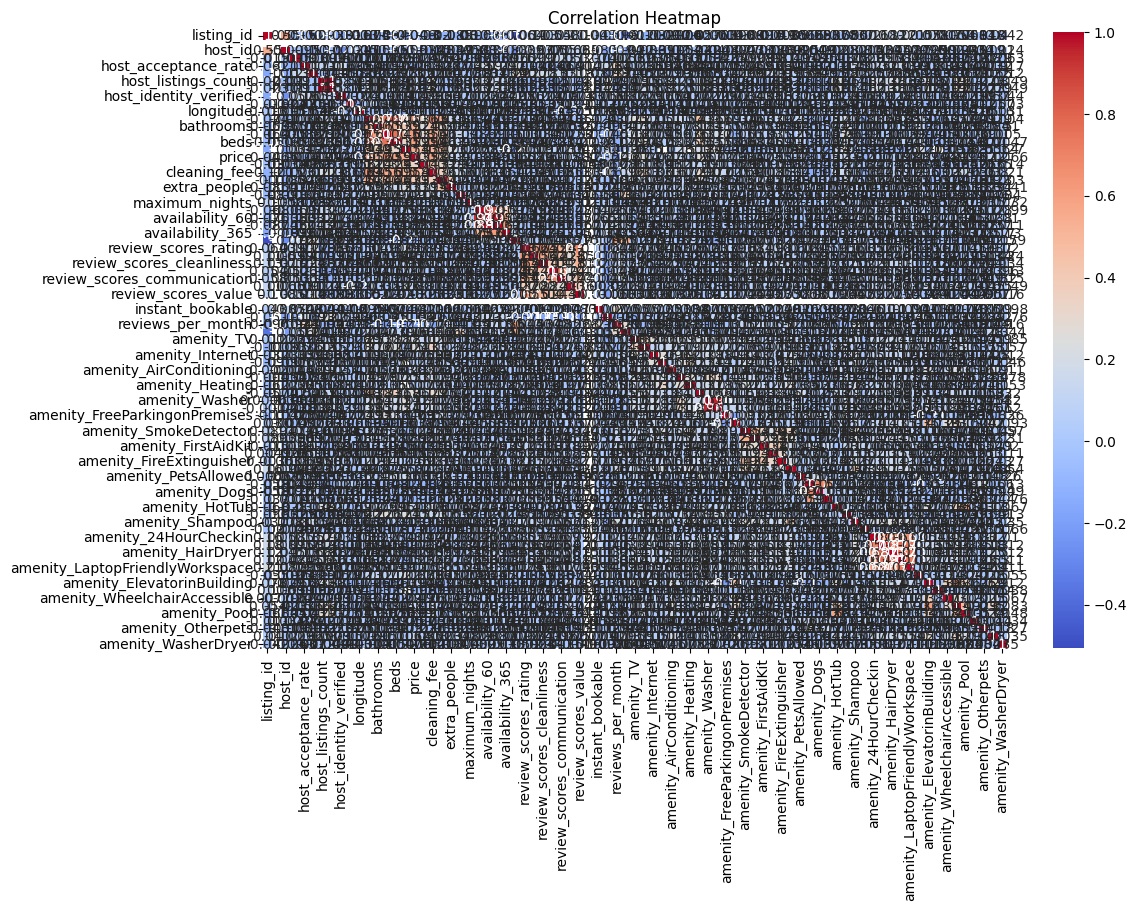

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Tampilkan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Tampaknya ada kelompok fitur yang berbeda yang menunjukkan tingkat korelasi yang lebih tinggi. Fasilitas yang umum cenderung hadir karena kemungkinan persyaratan hukum atau sebagai standar, sehingga menunjukkan korelasi positif.Selain itu, beberapa fasilitas mewah berkorelasi dengan daftar harga yang lebih tinggi.

Konfigurasi properti (beds, bathrooms) hampir sepenuhnya terkait karena mereka saling bergantung satu sama lain atau dapat diimputasi karena konfigurasi industri standar di pasar perumahan (misalnya 2 bed 1 bath). Struktur harga menunjukkan korelasi yang lebih kuat karena daftar dengan harga tinggi berkorelasi dengan biaya pemeliharaan yang lebih tinggi.

In [72]:
def chart_numeric_feature(dataset, feature):
    fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12, 8))

    sns.boxplot(data=dataset, x=feature, ax=ax[0])
    ax[0].set_title(f'{feature} Distribution Boxplot')

    #sns.histplot(data=dataset x=feature, kde=True, ax=ax[1])
    plt.hist(data[feature], density=True, bins=30)
    ax[1].set_title(f'{feature} Distribution Histogram')

    plt.show()

In [73]:
def chart_numeric_feature_by_target(dataset, target):
    fig, ax = plt.subplots(4, 2, figsize=(20, 50))
    ax = ax.flatten()

    for counter, feature in enumerate(dataset):
        if counter < len(dataset):
            sns.histplot(data=dataset, x=feature, kde=True, hue=target, ax=ax[counter])
            ax[counter].set_title('{} Histogram: {}'.format(feature, target))
        else:
            sns.countplot(data=dataset, x=feature, hue=target, ax=ax[counter])
            ax[counter].set_title('{} Bar Chart: {}'.format(feature, target))

    plt.show()

In [74]:
def chart_categorical_feature(dataset, feature):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    data_ = dataset[dataset[feature].isnull() == False]
    data_ = data_[feature]

    # Bar Chart
    ax[0].bar(x=data_.unique(), height=data_.value_counts())
    ax[0].set_title(f'{feature} Bar Chart')

    # Pie Chart
    data_.value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1])
    ax[1].set_title(f'{feature} Pie Chart')

    plt.show()

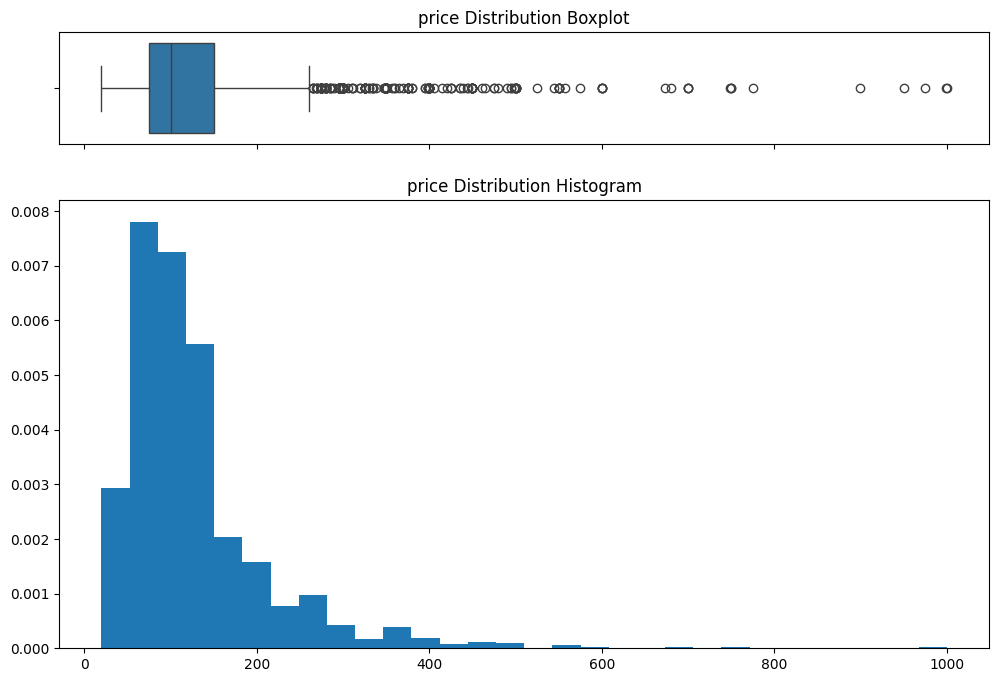

In [75]:
chart_numeric_feature(data, 'price')

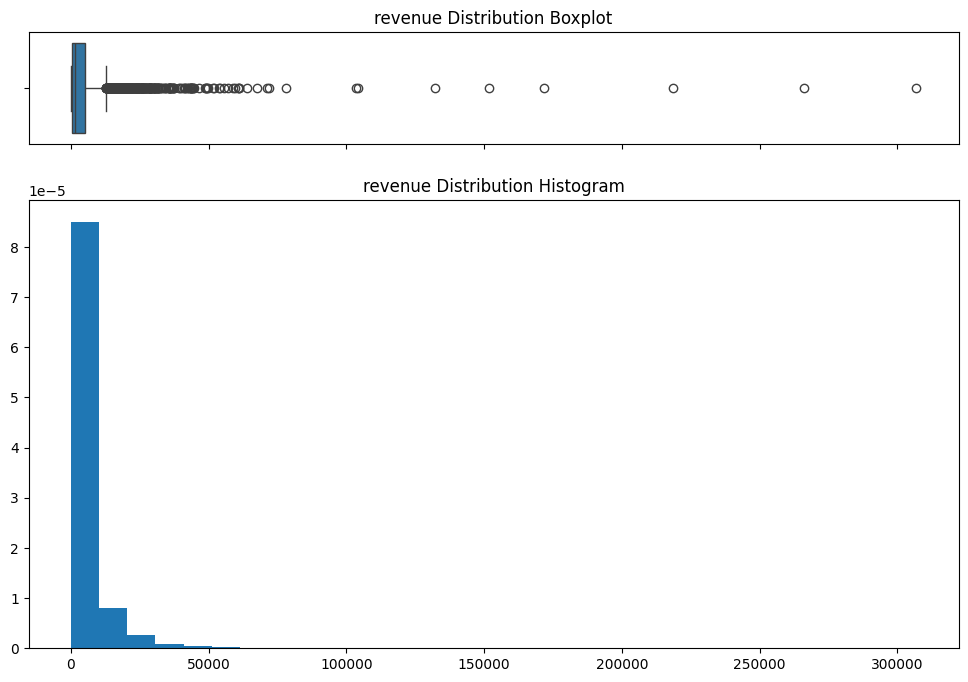

In [76]:
chart_numeric_feature(data, 'revenue')

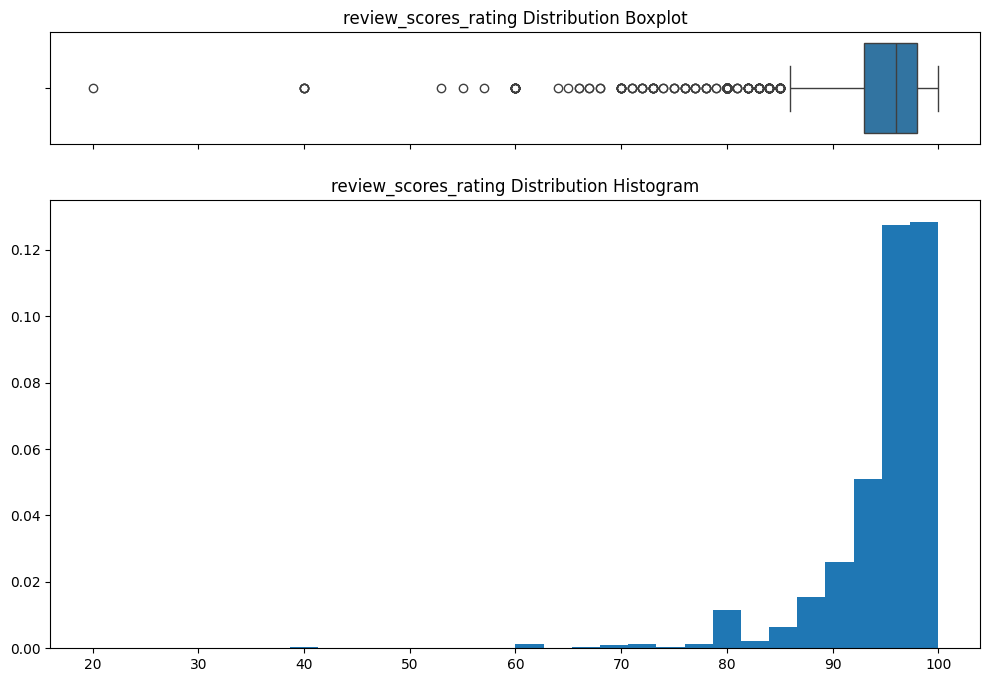

In [77]:
chart_numeric_feature(data, 'review_scores_rating')

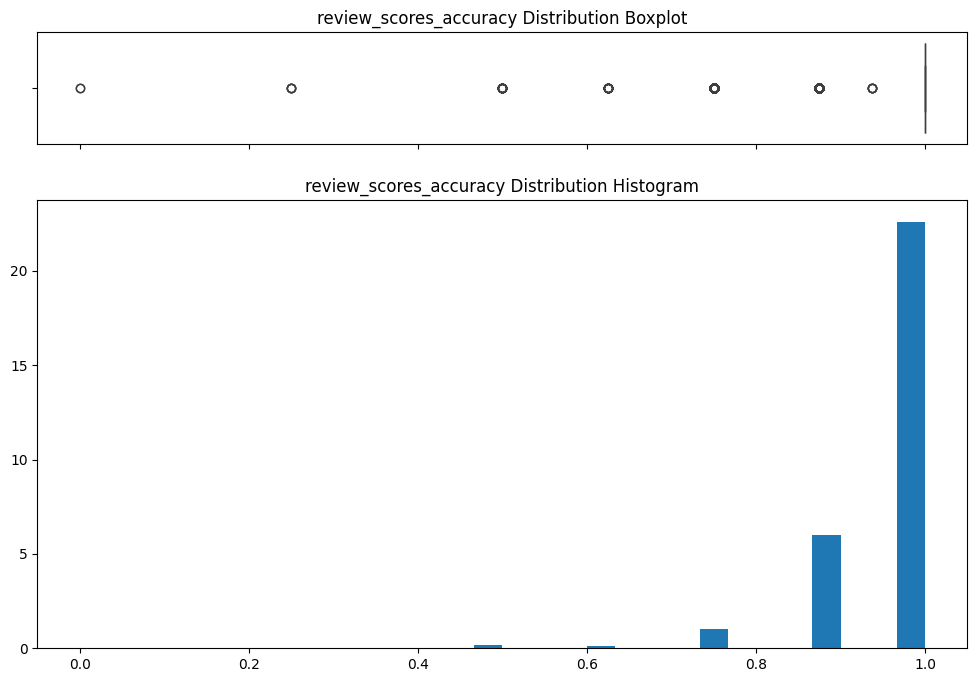

In [78]:
chart_numeric_feature(data, 'review_scores_accuracy')

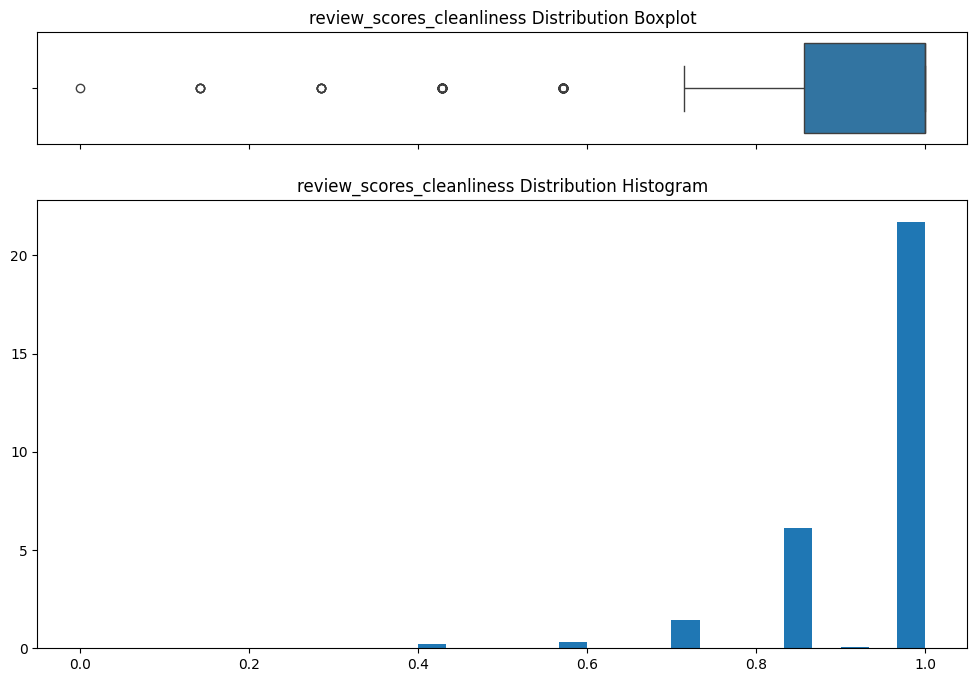

In [79]:
chart_numeric_feature(data, 'review_scores_cleanliness')

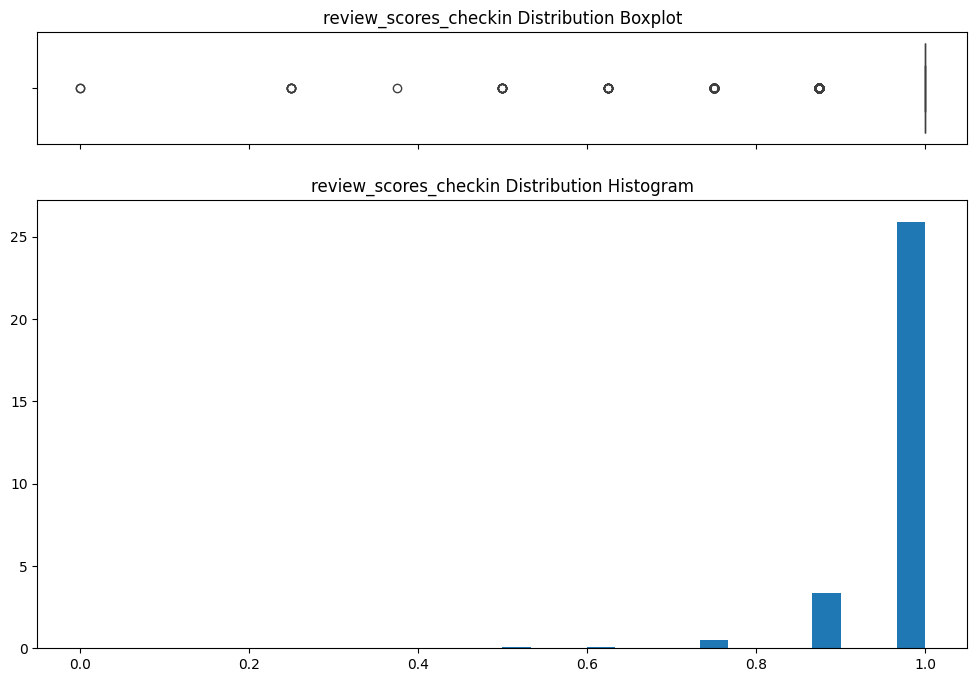

In [80]:
chart_numeric_feature(data, 'review_scores_checkin')

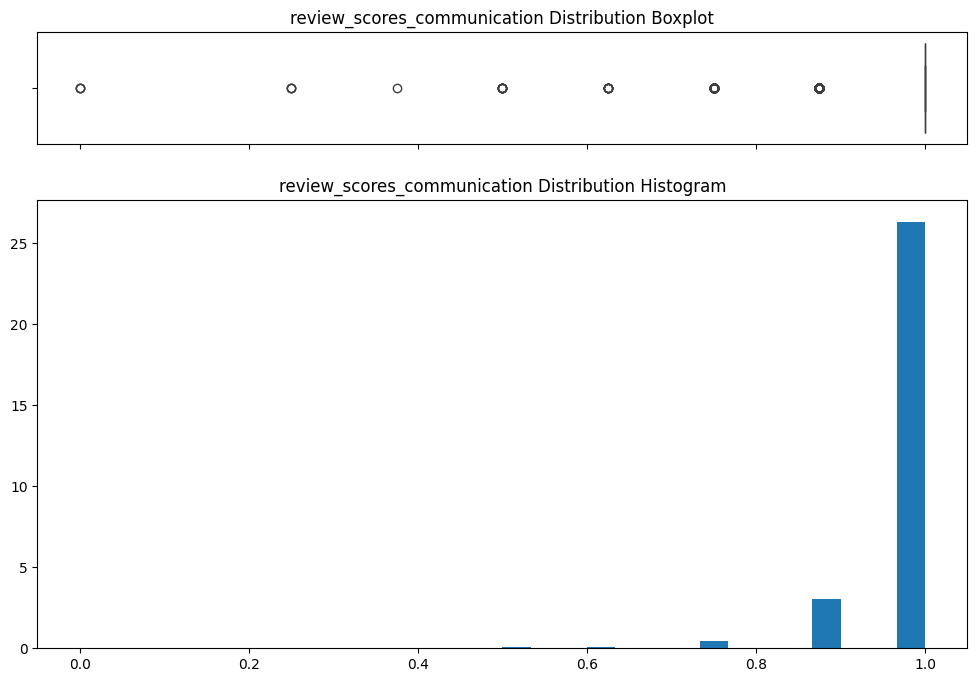

In [81]:
chart_numeric_feature(data, 'review_scores_communication')

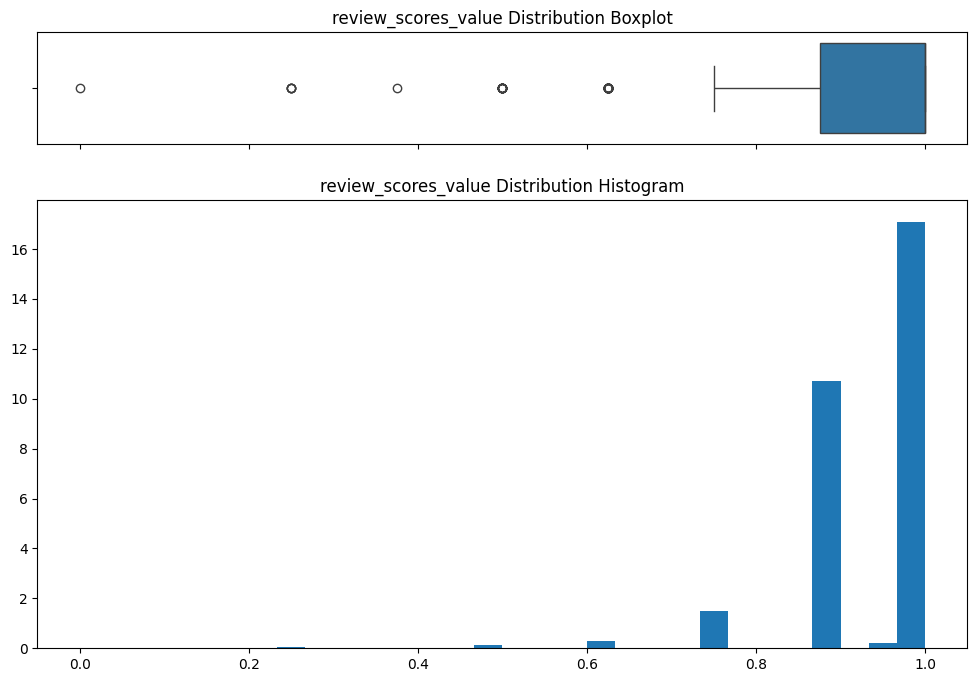

In [82]:
chart_numeric_feature(data, 'review_scores_value')

In [83]:
highest_rated_areas = pd.DataFrame(data['neighbourhood_group_cleansed'].unique(), columns=['area'])
mean_rating = []
mean_revenue = []
mean_latitude = []
mean_longitude = []
for area in highest_rated_areas['area'].unique():
    mean_rating.append(data[data['neighbourhood_group_cleansed'] == area]['review_scores_rating'].mean())
    mean_revenue.append(data[data['neighbourhood_group_cleansed'] == area]['revenue'].mean())
    mean_latitude.append(data[data['neighbourhood_group_cleansed'] == area]['latitude'].mean())
    mean_longitude.append(data[data['neighbourhood_group_cleansed'] == area]['longitude'].mean())
highest_rated_areas['mean_rating'] = mean_rating
highest_rated_areas['mean_revenue'] = mean_revenue
highest_rated_areas['mean_latitude'] = mean_latitude
highest_rated_areas['mean_longitude'] = mean_longitude

In [84]:
highest_rated_areas

area  mean_rating  mean_revenue  mean_latitude  \
0            Queen Anne    95.701695   6038.752542      47.634047   
1               Ballard    95.686957   6078.726087      47.674525   
2   Other neighborhoods    94.785894   4409.843829      47.670646   
3               Cascade    93.730337   4075.134831      47.633757   
4          Central Area    96.163957   4636.371274      47.607715   
..                  ...          ...           ...            ...   
12             Delridge    95.987342   3641.189873      47.545983   
13          Seward Park    95.022727   4063.500000      47.554276   
14            Northgate    94.912500   2962.362500      47.702454   
15         Capitol Hill    94.414462   4951.910053      47.623578   
16            Lake City    94.701493   2476.432836      47.712153   

    mean_longitude  
0      -122.357751  
1      -122.380150  
2      -122.335808  
3      -122.331631  
4      -122.301760  
..             ...  
12     -122.362599  
13     -122.268686  
14     -122.325100  
15     -122.316462  
16     -122.293985  

[17 rows x 5 columns]

####**1. Apa saja area dengan peringkat tertinggi untuk memesan akomodasi di Seattle?**

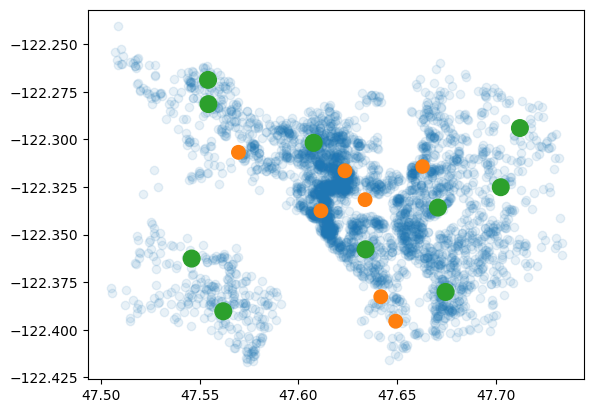

In [85]:
plt.scatter(data['latitude'], data['longitude'], alpha=0.1)
plt.scatter(highest_rated_areas['mean_latitude'], highest_rated_areas['mean_longitude'], highest_rated_areas['mean_rating'])
filtered_areas = highest_rated_areas.sort_values('mean_rating', ascending=False)[0:10]
plt.scatter(filtered_areas['mean_latitude'], filtered_areas['mean_longitude'], filtered_areas['mean_rating'] * 1.5)
plt.rcParams['figure.figsize'] = [15, 8]
plt.show()

In [86]:
display(highest_rated_areas[['area', 'mean_rating']].sort_values('mean_rating', ascending=False)[:10])

area  mean_rating
4          Central Area    96.163957
8          West Seattle    96.061576
12             Delridge    95.987342
0            Queen Anne    95.701695
1               Ballard    95.686957
13          Seward Park    95.022727
14            Northgate    94.912500
11       Rainier Valley    94.911950
2   Other neighborhoods    94.785894
16            Lake City    94.701493

Top 10 lingkungan Terbaik dengan Peringkat Tertinggi terdaftar di atas dalam urutan menurun.

####**2. Apa saja lingkungan dengan revenue tertinggi di Seattle?**

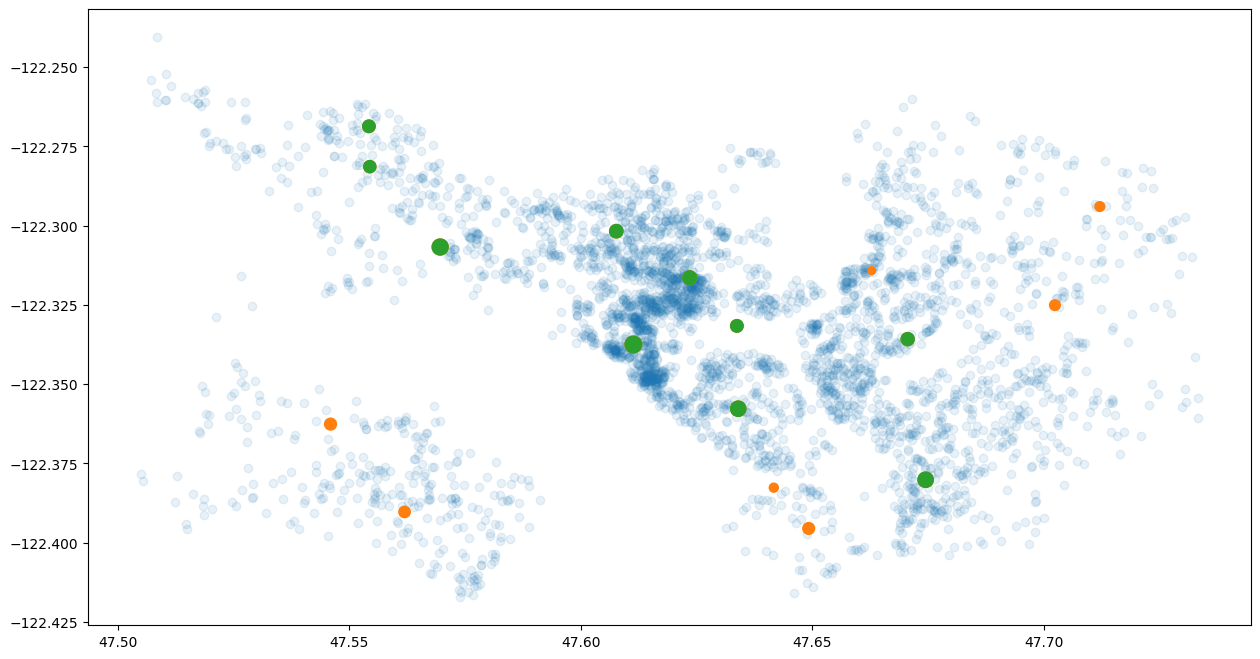

In [87]:
plt.scatter(data['latitude'], data['longitude'], alpha=0.1)
plt.scatter(highest_rated_areas['mean_latitude'], highest_rated_areas['mean_longitude'], highest_rated_areas['mean_revenue'] / 50)
filtered_areas = highest_rated_areas.sort_values('mean_revenue', ascending=False)[0:10]
plt.scatter(filtered_areas['mean_latitude'], filtered_areas['mean_longitude'], filtered_areas['mean_revenue'] / 50)
plt.show()

In [88]:
display(highest_rated_areas[['area', 'mean_revenue']].sort_values('mean_revenue', ascending=False)[:10])

area  mean_revenue
6              Downtown   7247.666038
10          Beacon Hill   6606.983051
1               Ballard   6078.726087
0            Queen Anne   6038.752542
15         Capitol Hill   4951.910053
4          Central Area   4636.371274
2   Other neighborhoods   4409.843829
3               Cascade   4075.134831
13          Seward Park   4063.500000
11       Rainier Valley   3827.345912

Top 10 Lingkungan dengan Pendapatan Tertinggi terdaftar di atas dalam urutan menurun.

####**3. Apa saja fasilitas yang paling banyak disediakan oleh tuan rumah di Seattle?**

<ipython-input-89-086835a98408>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  amenities['count'].iloc[i] = amenity['amenity_{}'.format(idx)].sum()
<ipython-input-89-086835a98408>:4: SettingWithCopyWarning: 
A value is trying to be set on 

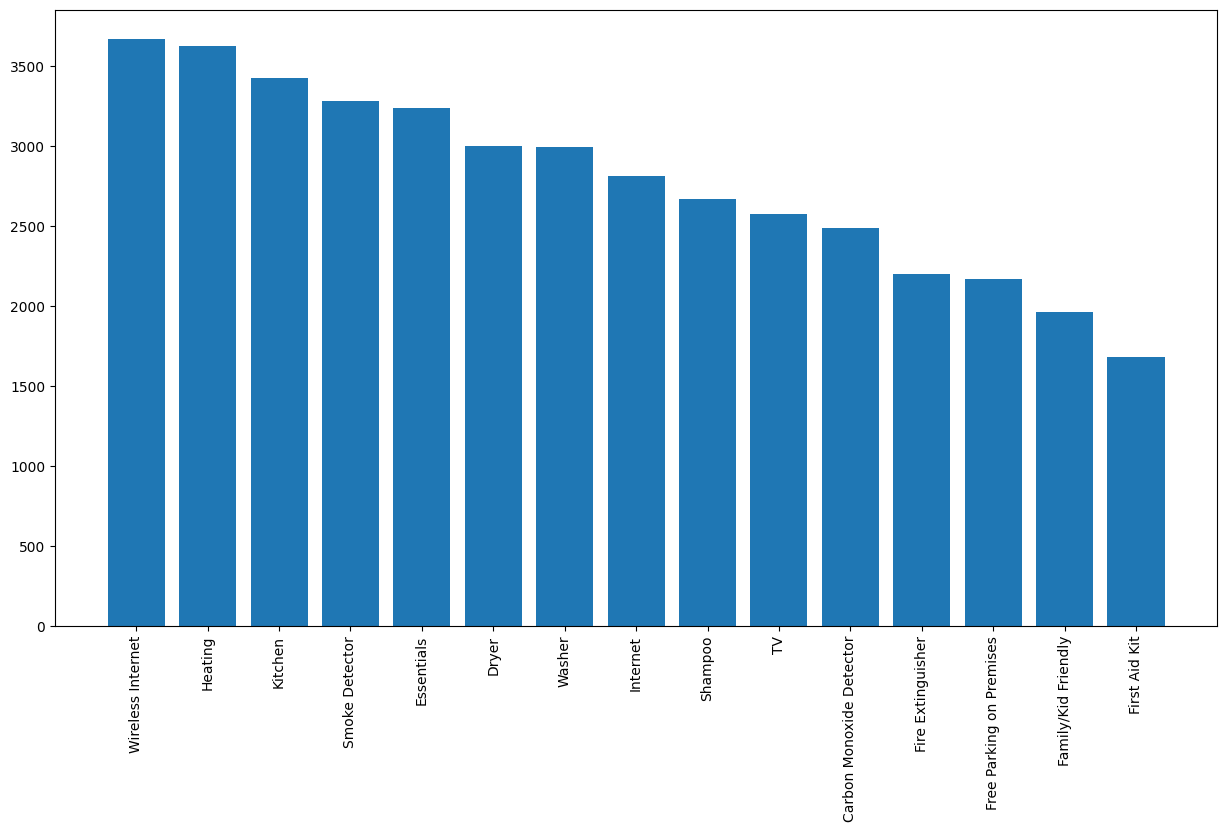

In [89]:
amenities['count'] = 0
i = 0
for idx in amenity_types:
    amenities['count'].iloc[i] = amenity['amenity_{}'.format(idx)].sum()
    i += 1

plt.bar(amenities.sort_values('count', ascending=False)[:15]['amenity'], amenities.sort_values('count', ascending=False)[:15]['count'])
plt.xticks(rotation=90)
plt.show()

Top 15 Fasilitas Teratas yang Paling Banyak Disediakan tercantum di atas dalam urutan menurun. Asumsinya adalah bahwa beberapa fasilitas diwajibkan oleh hukum, sementara yang lain adalah fasilitas tambahan yang tidak esensial tetapi berpotensi menarik bagi tamu.

Kecuali beberapa fasilitas yang mungkin diwajibkan oleh undang-undang Negara Bagian Washington seperti smoke detectors, carbon monoxide detectors, dan fire extinguishers, penyediaan fasilitas yang ditampilkan dalam grafik di atas dalam urutan menurun berdasarkan ketersediaan keseluruhan, menunjukkan beberapa kenyamanan paling populer yang dapat dinikmati para pengunjung ke Seattle di Airbnb.

Ini dapat ditafsirkan untuk mengidentifikasi baseline spesifik untuk fasilitas yang perlu ditawarkan oleh tuan rumah agar dapat bersaing di pasar.

####**Linear Regression**

Karena kita fokus pada Linear Regression dengan pertanyaan bisnis yang mencari inference daripada prediksi. Menggunakan pemisahan observasi untuk memastikan banyak kekuatan penjelasan dapat diambil dari daftar fitur untuk menentukan feature importance. Mengekstrak koefisien (beta parameters) dari Linear Regression untuk interpretasi ringan dan untuk memahami besaran serta arah dampak pada target.

Signifikansi statistik dapat diperoleh jika menulis fungsi tambahan yang menghitung P-values, karena scikit-learn tidak khusus untuk non-predictive modelling. Namun, untuk tujuan project ini, telah membatasi hanya pada pengamatan koefisien dalam menjawab pertanyaan bisnis yang menarik.

In [90]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [91]:
def display_results(y_true, y_pred):
    rsq = metrics.r2_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)

    print('R-Sq: ', round(rsq, 4))
    print('MAE: ', round(mae, 4))
    print('MSE: ', round(mse, 4))
    print('RMSE: ', round(np.sqrt(mse), 4))

####**4. Skor mana yang paling penting untuk ratings keseluruhan?(Linear Regression)**

<Axes: >

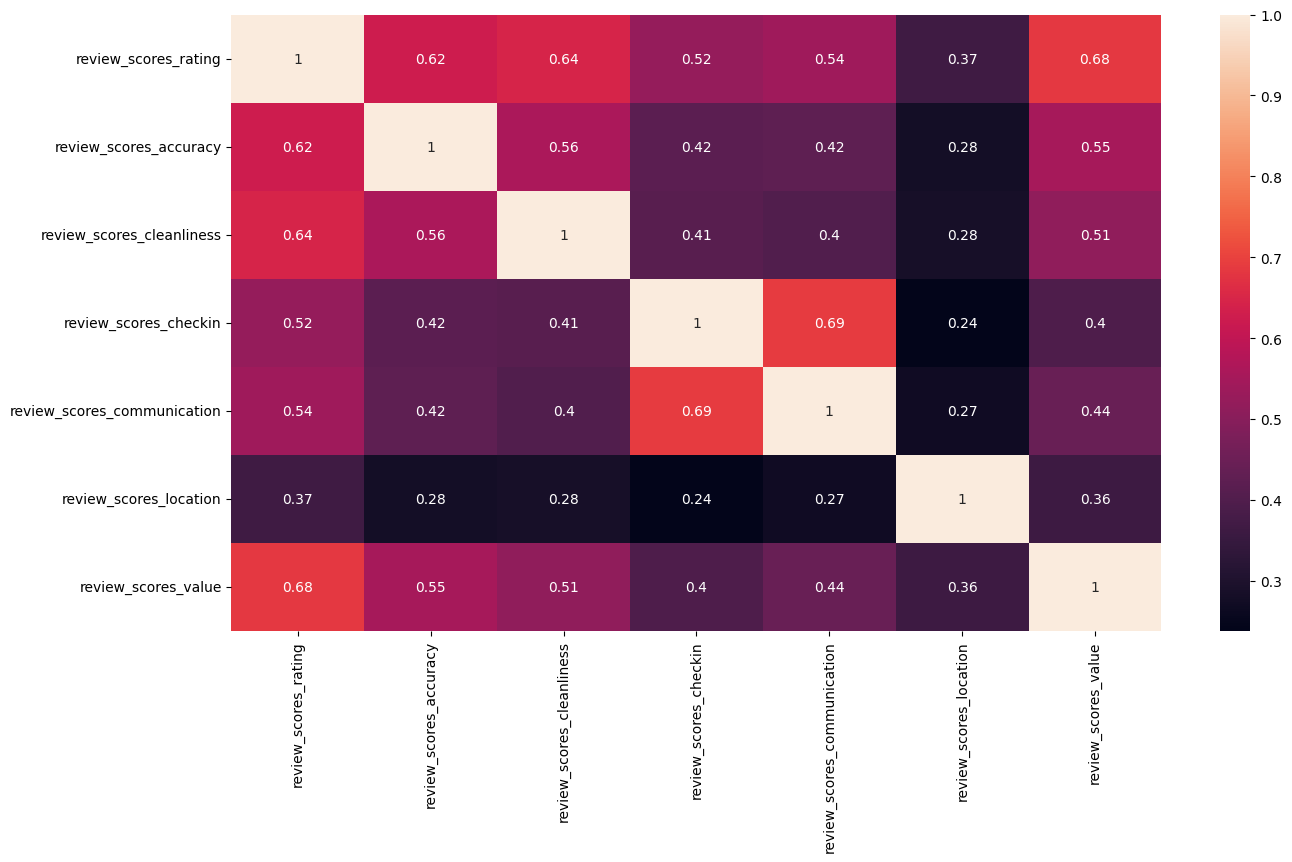

In [92]:
sns.heatmap(data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr(), annot=True)

In [93]:
pd.DataFrame(data[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr()[1:7]['review_scores_rating'])

review_scores_rating
review_scores_accuracy                   0.622603
review_scores_cleanliness                0.643828
review_scores_checkin                    0.522128
review_scores_communication              0.540907
review_scores_location                   0.365747
review_scores_value                      0.682126

Peringkat ulasan positif berkorelasi positif dengan semua skor komposit hingga tingkat yang bervariasi.

In [94]:
model = LinearRegression()

In [95]:
x = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(data[x], data['review_scores_rating'], test_size = 0.2, random_state=42)

In [97]:
model.fit(X_train, y_train)

LinearRegression()

In [98]:
display_results(y_test, model.predict(X_test))

R-Sq:  0.5676
MAE:  2.303
MSE:  13.6031
RMSE:  3.6882


Tampaknya melakukan regresi pada dataset pelatihan menunjukkan bahwa skor riview komponen menjelaskan 56,76% dari peringkat riview keseluruhan untuk dataset uji dalam model linear regression ini. Saat ini tidak mempertimbangkan P-values untuk menentukan apakah regressor secara statistik signifikan, tetapi hanya mengamati model coefficients untuk menentukan tingkat dampak regressor terhadap penilaian keseluruhan.

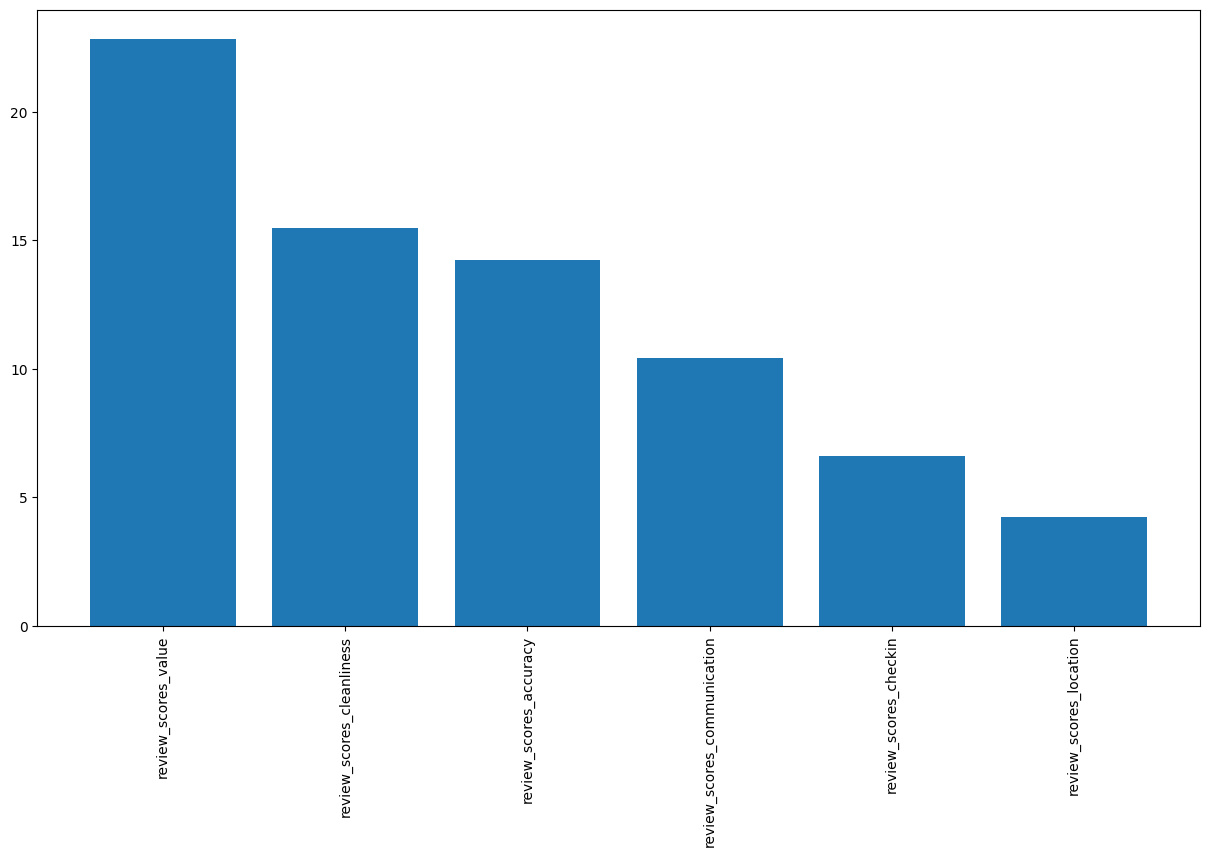

In [99]:
coefficients = pd.DataFrame(x, columns=['regressor'])
coefficients['coefficient'] = model.coef_
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

Tiga faktor riview teratas yang mempengaruhi penilaian keseluruhan untuk seorang tuan rumah adalah:

1. Value
2. Cleanliness
3. Accuracy

Ini menyiratkan bahwa tamu memberikan bobot lebih pada nilai untuk uang dari masa tinggal mereka, kebersihan akomodasi yang disediakan oleh tuan rumah, dan sejauh mana deskripsi tuan rumah tentang akomodasi mereka sesuai dengan deskripsi yang diberikan saat menentukan skor keseluruhan mereka untuk masa tinggal.

Ini berbeda dari correlation matrix yang menunjukkan bahwa pengalaman check-in adalah kontributor ketiga yang paling terkait dengan penilaian keseluruhan, tetapi sebaliknya relatif cocok dengan 2/3 kontributor kecuali dalam urutan dampak koefisien.

Tuan rumah yang ingin meningkatkan peringkat keseluruhan mereka dapat lebih berusaha untuk menjaga kebersihan tempat mereka dan memberikan informasi yang sangat deskriptif tentang daftar mereka di Airbnb. Mereka juga dapat menawarkan tarif yang kompetitif sesuai dengan kemampuan mereka.

####**5. Apakah tuan rumah dengan ratings lebih tinggi secara keseluruhan menghasilkan revenue lebih tinggi?(Linear Regression)**

<Axes: >

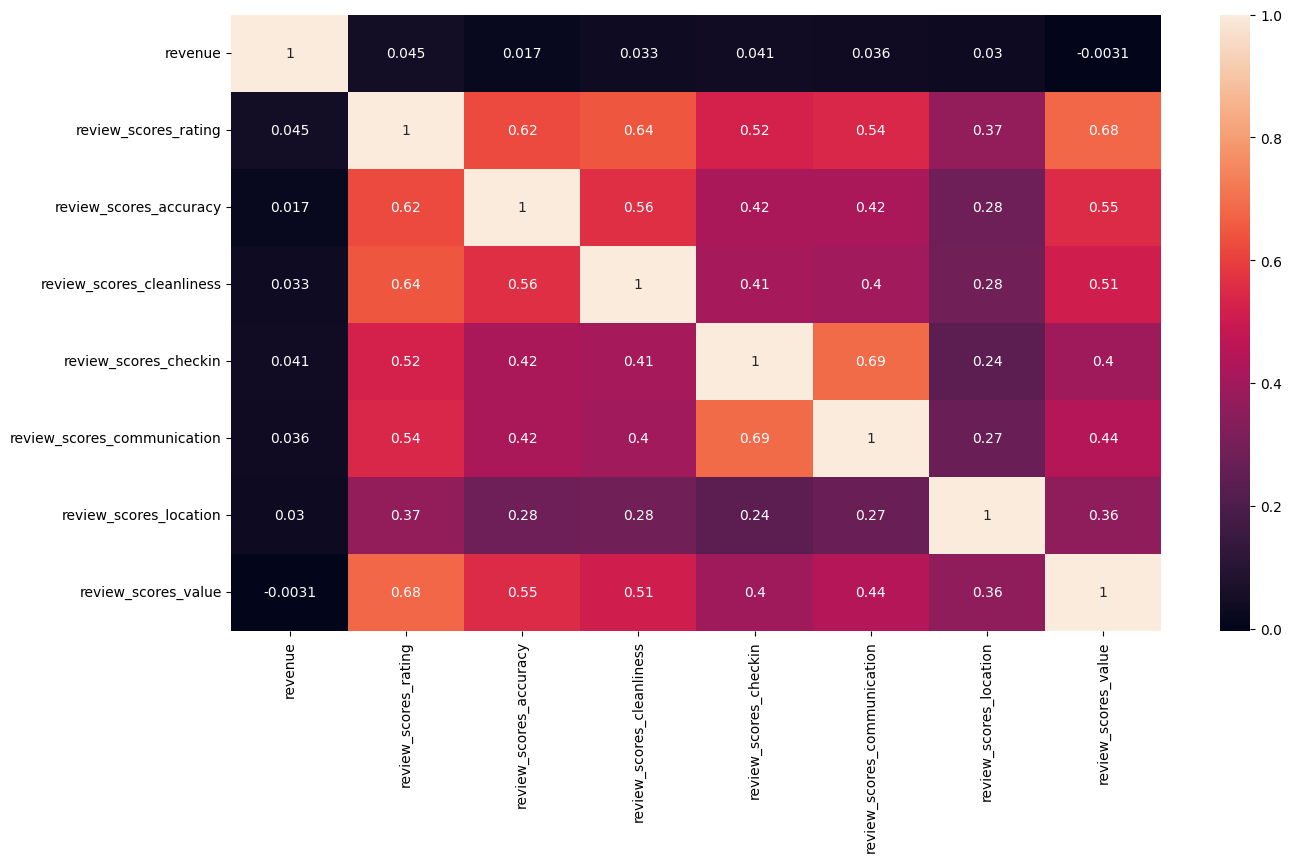

In [100]:
sns.heatmap(data[['revenue', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].corr(), annot=True)

Tampaknya tidak ada korelasi antara revenue dan peringkat komposit / peringkat komponen dari para penyelenggara.

In [101]:
model = LinearRegression()

In [102]:
x = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(data[x], data['revenue'], test_size=0.2, random_state=42)

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
display_results(y_test, model.predict(X_test))

R-Sq:  0.0011
MAE:  5820.0245
MSE:  257155199.4667
RMSE:  16036.0593


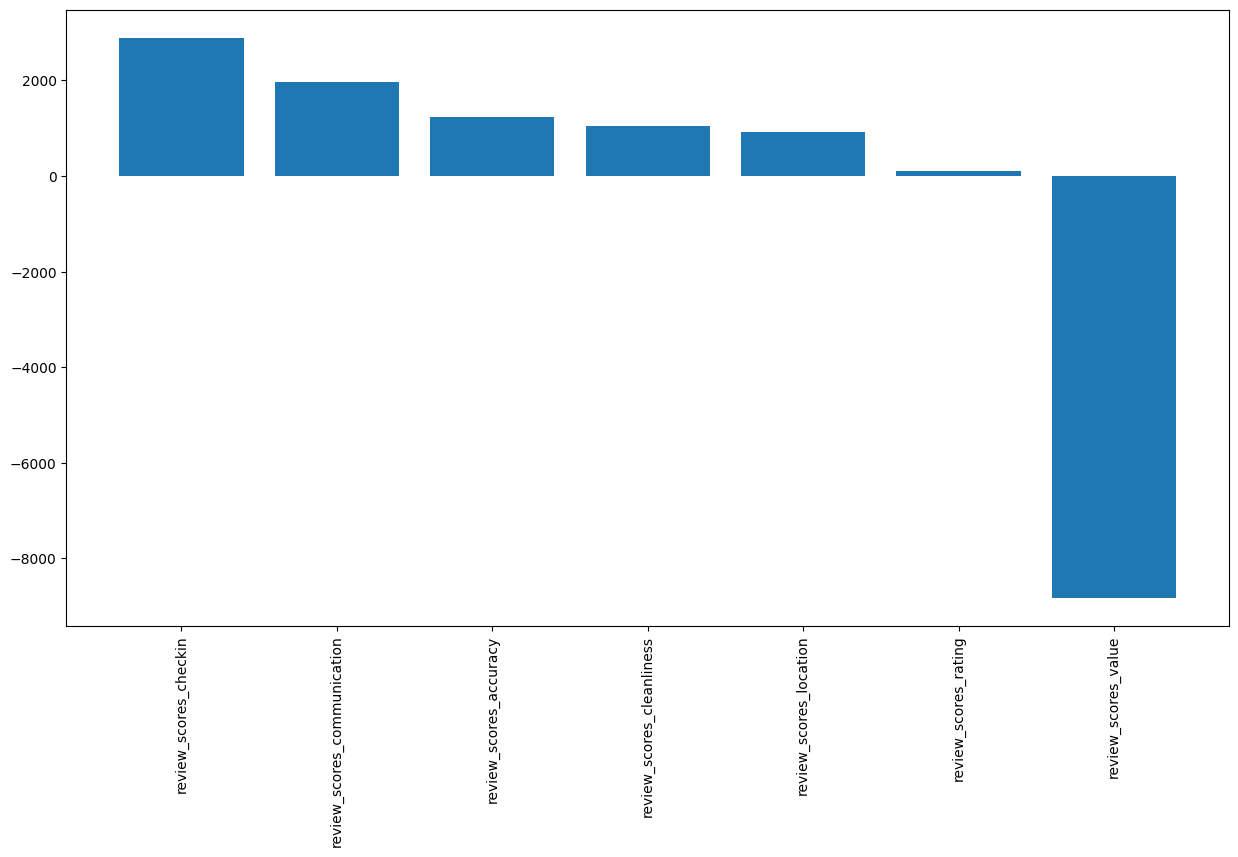

In [106]:
coefficients = pd.DataFrame(x, columns=['regressor'])
coefficients['coefficient'] = model.coef_
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

Pada awalnya, daftar dengan peringkat nilai untuk uang yang tinggi tampak terkait dengan dampak negatif terhadap estimasi revenue. Sebaliknya, peringkat positif untuk check-in experience, location, openness in communication of the host, dan cleanliness berhubungan positif dengan revenue yang diperoleh, termasuk peringkat keseluruhan yang berkaitan dengan peningkatan revenue terendah. Namun, Listings dengan deskripsi akurat justru menunjukkan dampak negatif terhadap revenue. Meski demikian, karena kekuatan penjelasan fitur sangat rendah yaitu hanya 0,11%, kesalahan residual sangat tinggi, dan koefisien tidak signifikan, maka efek peringkat riview terhadap revenue tidak dapat diinterpretasikan secara meyakinkan. Ini menunjukkan bahwa faktor lain di luar penilaian pengguna kemungkinan lebih berperan dalam menentukan potensi revenue sebuah Listings.

####**6. Fasilitas, karakteristik perumahan, dan faktor apa yang berkontribusi positif terhadap revenue?(Linear Regression)**

In [107]:
target_revenue = pd.DataFrame(data['revenue'])
target_rating = pd.DataFrame(data['review_scores_rating'])

In [108]:
X.drop(['listing_id', 'nbdg_Other neighborhoods', 'property_Other', 'room_Shared room', 'cancel_flexible'], axis=1, inplace=True)

GLMs memerlukan penghapusan satu kolom kategorikal (one-hot encoded) dalam setiap set untuk mencegah collinearity sempurna.

In [109]:
model = LinearRegression()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, target_revenue, test_size=0.2, random_state=42)

In [111]:
model.fit(X_train, y_train)

LinearRegression()

In [112]:
display_results(y_test, model.predict(X_test))

R-Sq:  0.2334
MAE:  3828.2114
MSE:  197344926.1275
RMSE:  14047.951


Tampaknya melakukan regression pada dataset pelatihan menunjukkan bahwa regressors yang terdaftar menjelaskan 23,34% dari data uji di luar sampel untuk perkiraan revenue keseluruhan dalam model linear regression ini. Saat ini tidak mempertimbangkan P-values untuk menentukan apakah regressors signifikan secara statistik, tetapi hanya mengamati model coefficients untuk menentukan tingkat dampak regressor terhadap peringkat keseluruhan.


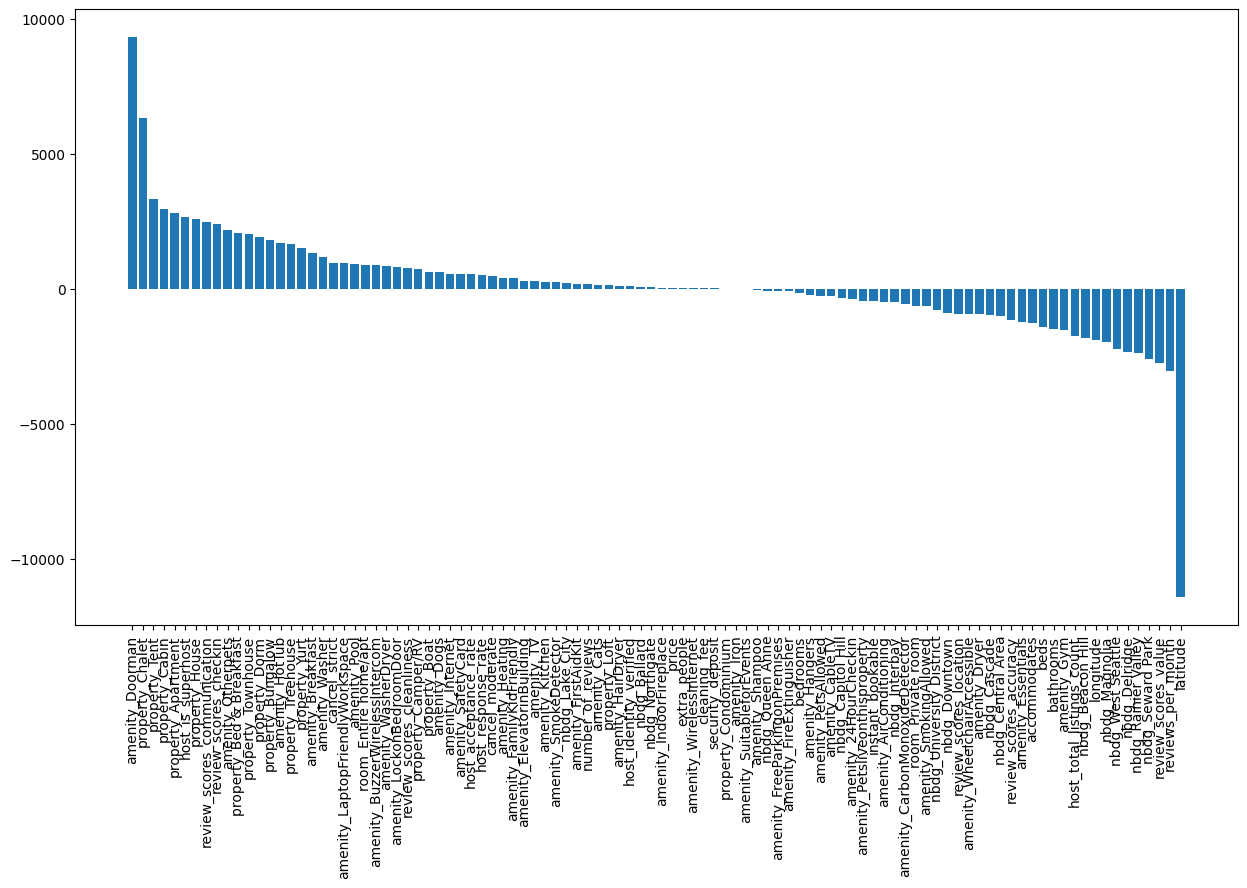

In [113]:
coefficients = pd.DataFrame(X.columns.to_list(), columns=['regressor'])
coefficients['coefficient'] = model.coef_.T
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

In [114]:
pd.set_option('display.max_rows', None)
display(coefficients.sort_values('coefficient', ascending=False)[:25])
pd.set_option('display.max_rows', 10)

regressor  coefficient
39                  amenity_Doorman  9310.589973
63                  property_Chalet  6316.875819
68                    property_Tent  3331.438055
61                   property_Cabin  2952.686021
57               property_Apartment  2792.027575
97                host_is_superhost  2654.337860
66                   property_House  2579.150045
86      review_scores_communication  2448.709818
85            review_scores_checkin  2398.073182
38                amenity_Otherpets  2182.835495
58         property_Bed & Breakfast  2059.278779
69               property_Townhouse  2020.813132
65                    property_Dorm  1923.970900
60                property_Bungalow  1795.668248
22                   amenity_HotTub  1698.385446
70               property_Treehouse  1643.408020
71                    property_Yurt  1488.135627
25                amenity_Breakfast  1317.736829
8                    amenity_Washer  1149.837689
75                    cancel_strict   961.446022
30  amenity_LaptopFriendlyWorkspace   939.632867
36                     amenity_Pool   922.378891
72             room_Entire home/apt   886.958779
11   amenity_BuzzerWirelessIntercom   862.887520
40              amenity_WasherDryer   837.331789

Top 25 fasilitas, karakteristik perumahan, dan faktor serupa yang paling berkontribusi positif terhadap revenue tuan rumah Airbnb ditampilkan dalam diagram batang di atas.

Revenue Airbnb cenderung lebih tinggi untuk daftar dengan kebijakan pembatalan ketat dan host berstatus Super Host, yang menunjukkan bahwa verifikasi host dan penegakan aturan dapat menarik tamu berkualitas. Peringkat pengalaman check-in juga berhubungan positif dengan revenue.

Selain itu, listings bertipe "Seluruh Rumah atau Apartemen" berkontribusi signifikan terhadap revenue, karena properti utuh lebih diminati dan dihargai lebih tinggi. Karakteristik properti perumahan tertentu juga menjadi faktor penting dalam meningkatkan revenue. Sifat dari properti perumahan tertentu yang terdaftar di Airbnb sangat terkait dengan kontribusi positif sebagai fitur yang menjelaskan revenue termasuk:

- Chalet
- Tent
- Cabin
- Apartment
- House
- Bed & Breakfast
- Townhouse
- Dormitory
- Bungalow
- Treehouse
- Yurt

Tempat tinggal alternatif atau akomodasi mewah menciptakan pengalaman homestay yang menarik atau unik, yang tidak selalu ditawarkan oleh hotel yang mungkin beroperasi untuk mengurangi risiko bagi tamu dan menawarkan pengalaman yang paling konsisten terlepas dari lokasi di dunia. Pengamatan ini membenarkan proposisi nilai unik yang dapat ditawarkan oleh Airbnb di industri ini.

Fasilitas yang berharga dalam urutan nilai menurun yang berhubungan positif dengan revenue termasuk:

- Doorman
- Other Pets
- Hot Tub
- Breakfast
- Washer
- Laptop-friendly Workplace
- Pool
- Buzzer / Wireless Intercom
- Washer & Dryer

Fasilitas tertentu menjadi indikator penting dalam menarik tamu di Airbnb. Fitur seperti petugas keamanan dan interkom mewakili keamanan, sementara bak mandi air panas, tempat kerja jarak jauh, kolam renang, dan sarapan gratis melambangkan kenyamanan dan kemewahan yang dicari tamu. Revenue lebih tinggi ditemukan pada listings dengan kebijakan pembatalan ketat, status Super Host, pengalaman check-in positif, dan tipe kamar "Seluruh Rumah atau Apartemen", karena properti utuh lebih diminati. Tidak ada lingkungan spesifik yang secara signifikan meningkatkan revenue, namun properti di West Seattle, Magnolia, Delridge, Rainier Valley, dan Seward Park cenderung menghasilkan revenue lebih rendah. Faktor-faktor ini tercermin dalam daftar dan grafik fasilitas, karakteristik perumahan, serta elemen lain yang paling berkontribusi positif terhadap revenue.

Sifat dari properti perumahan tertentu yang terdaftar di Airbnb sangat terkait dengan kontribusi positif sebagai fitur yang menjelaskan revenue termasuk:
1. Chalet
2. Tent
3. Cabin
4. Apartment
5. House
6. Bed & Breakfast
7. Townhouse
8. Dormitory
9. Bungalow
10. Treehouse
11. Yurt

Fasilitas yang berharga dalam urutan nilai menurun yang berasosiasi positif dengan revenue meliputi:
1. Doorman
2. Other Pets
3. Hot Tub
4. Breakfast
5. Washer
6. Laptop-friendly Workplace
7. Pool
8. Buzzer / Wireless Intercom
9. Washer & Dryer

####**7. Fasilitas, karakteristik perumahan, dan faktor apa yang berkontribusi positif terhadap ratings?(Analisis Linear Regression)**

In [115]:
model = LinearRegression()

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, target_rating, test_size=0.2, random_state=42)

In [117]:
model.fit(X_train, y_train)

LinearRegression()

In [118]:
display_results(y_test, model.predict(X_test))

R-Sq:  0.5624
MAE:  2.2955
MSE:  13.766
RMSE:  3.7103


Tampaknya melakukan regression pada dataset pelatihan menunjukkan bahwa regressors yang terdaftar menjelaskan 56,24% dari data uji untuk perkiraan revenue keseluruhan dalam model linier regression ini. Saat ini tidak mempertimbangkan P-values untuk menentukan apakah regressors secara statistik signifikan, tetapi hanya mengamati model coefficients untuk menentukan tingkat dampak regressors terhadap peringkat keseluruhan.

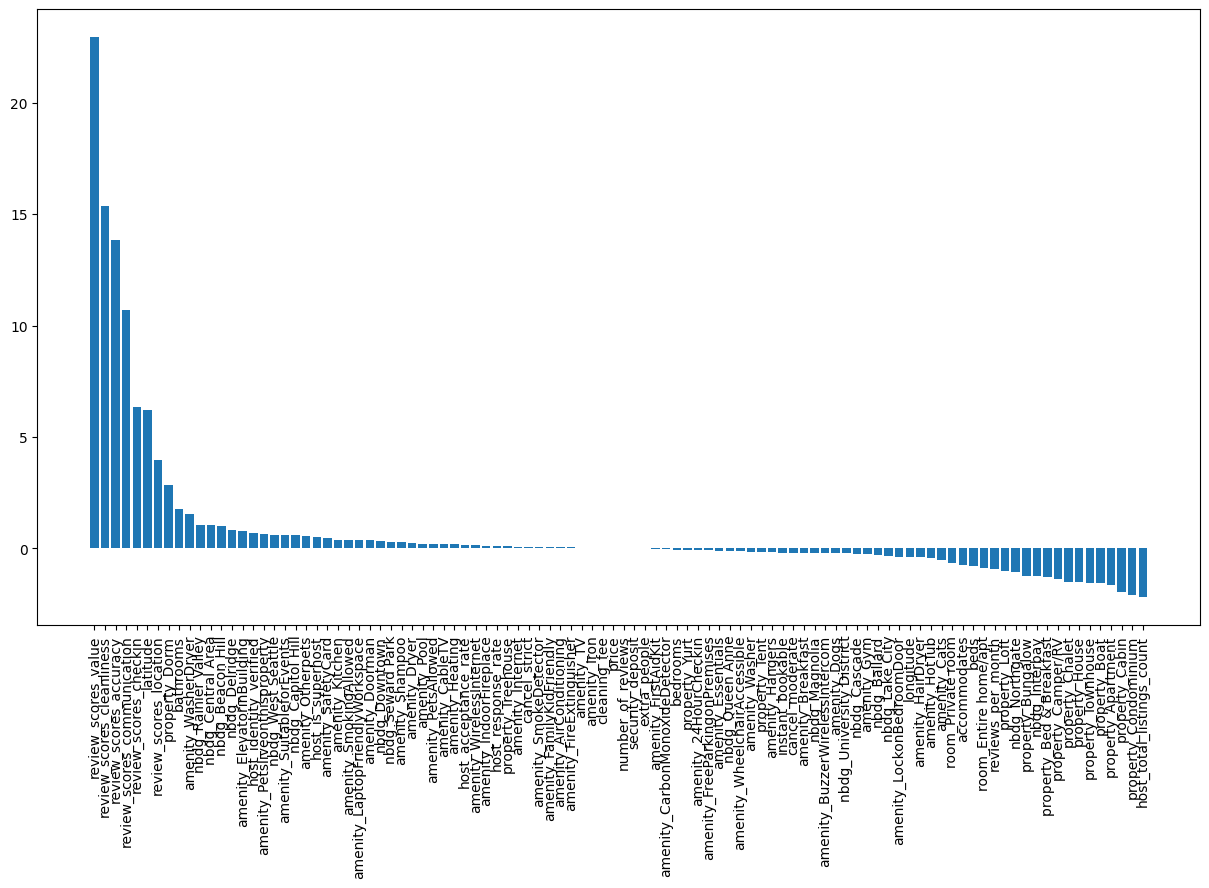

In [119]:
coefficients = pd.DataFrame(X.columns.to_list(), columns=['regressor'])
coefficients['coefficient'] = model.coef_.T
plt.bar(coefficients.sort_values('coefficient', ascending=False)['regressor'], coefficients.sort_values('coefficient', ascending=False)['coefficient'])
plt.xticks(rotation=90)
plt.show()

In [120]:
pd.set_option('display.max_rows', None)
display(coefficients.sort_values('coefficient', ascending=False)[:25])
pd.set_option('display.max_rows', 10)

regressor  coefficient
88             review_scores_value    22.941172
84       review_scores_cleanliness    15.364727
83          review_scores_accuracy    13.827552
86     review_scores_communication    10.693238
85           review_scores_checkin     6.345991
90                        latitude     6.190296
87          review_scores_location     3.978797
65                   property_Dorm     2.835734
80                       bathrooms     1.774559
40             amenity_WasherDryer     1.523699
53             nbdg_Rainier Valley     1.057804
45               nbdg_Central Area     1.030709
42                nbdg_Beacon Hill     1.002201
46                   nbdg_Delridge     0.823047
32      amenity_ElevatorinBuilding     0.793932
98          host_identity_verified     0.667569
19  amenity_Petsliveonthisproperty     0.628100
56               nbdg_West Seattle     0.602162
31       amenity_SuitableforEvents     0.587257
43               nbdg_Capitol Hill     0.583753
38               amenity_Otherpets     0.567418
97               host_is_superhost     0.506913
15              amenity_SafetyCard     0.469585
5                  amenity_Kitchen     0.379073
37          amenity_SmokingAllowed     0.368348

Hasil regression menunjukkan bahwa model dapat menjelaskan 56,24% dari data uji terkait estimasi revenue keseluruhan. Meskipun P-value tidak dianalisis, koefisien regressors menunjukkan pengaruh terhadap rating keseluruhan.

Top 25 fasilitas, karakteristik hunian, dan faktor terkait yang paling berkontribusi positif terhadap rating host Airbnb ditampilkan pada diagram batang. Rating cenderung lebih tinggi untuk listing dengan host berstatus Super Host dan terverifikasi, karena ini memberi rasa aman dan kepercayaan bagi tamu.

Selain itu, rating untuk nilai, kebersihan, akurasi deskripsi, komunikasi host, pengalaman check-in, dan lokasi semuanya memiliki kontribusi positif terhadap rating keseluruhan.

Menariknya, properti bergaya asrama juga mendapat rating tinggi, begitu pula rumah dengan lebih banyak kamar mandi, menandakan tamu menghargai aspek sosial maupun privasi dan aksesibilitas.

Selain itu, fasilitas yang disediakan yang cenderung mendapatkan peringkat lebih tinggi adalah sebagai berikut:

- Washer & Dryer
- Elevator
- Pets live on property
- Suitable for Events
- Other Pets allowed
- Safety Card
- Kitchen
- Smoker-friendly

Lingkungan dengan rating positif meliputi Rainier Valley, Central Area, Beacon Hill, Delridge, West Seattle, dan Capitol Hill. Menariknya, beberapa wilayah ini sebelumnya diasosiasikan dengan pendapatan rendah.

Hal ini bisa menunjukkan bahwa lokasi tersebut tetap diminati karena nilai lokasinya bagi tamu, meskipun pendapatannya rendah karena harga sewa lebih murah atau tingkat occupancy yang tidak konsisten.

Alternatif lainnya, lingkungan-lingkungan ini mungkin berada di area perkotaan yang strategis namun mahal, sehingga meskipun jarang disewa, tetap mendapat rating tinggi. Contohnya, Capitol Hill, Central Area, dan Rainier Valley menunjukkan kombinasi rating tinggi dan pendapatan tinggi, mencerminkan harga dan occupancy yang sama-sama tinggi.

___

### 5. Evaluation Model

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"--- Evaluation for {model_name} ---")
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"MAE  (Mean Absolute Error): {mae:.2f}")
    print(f"MSE  (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R²   (R-squared): {r2:.4f}\n")


In [130]:
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred, model_name="Linear Regression - Revenue Prediction")


--- Evaluation for Linear Regression - Revenue Prediction ---
MAE  (Mean Absolute Error): 2.30
MSE  (Mean Squared Error): 13.77
RMSE (Root Mean Squared Error): 3.71
R²   (R-squared): 0.5624



In [133]:
results = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2"])

def log_result(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    results.loc[len(results)] = [model_name, mae, mse, rmse, r2]

log_result("Linear Regression - Rating Prediction", y_test, y_pred)
display(results)


Model       MAE        MSE      RMSE  \
0  Linear Regression - Rating Prediction  2.295476  13.765966  3.710251   

         R2  
0  0.562396

Hasil evaluasi model linear regression menunjukkan bahwa model mampu menjelaskan sekitar 56,23% variasi data pada prediksi rating properti Airbnb di Seattle.

Nilai MAE sebesar 2,30 dan RMSE sebesar 3,71 mengindikasikan bahwa rata-rata kesalahan prediksi cukup kecil dibandingkan dengan rentang nilai target.

Secara keseluruhan, performa model sudah cukup baik untuk analisis eksploratif, meskipun masih terdapat ruang untuk perbaikan dengan pendekatan model yang lebih kompleks.

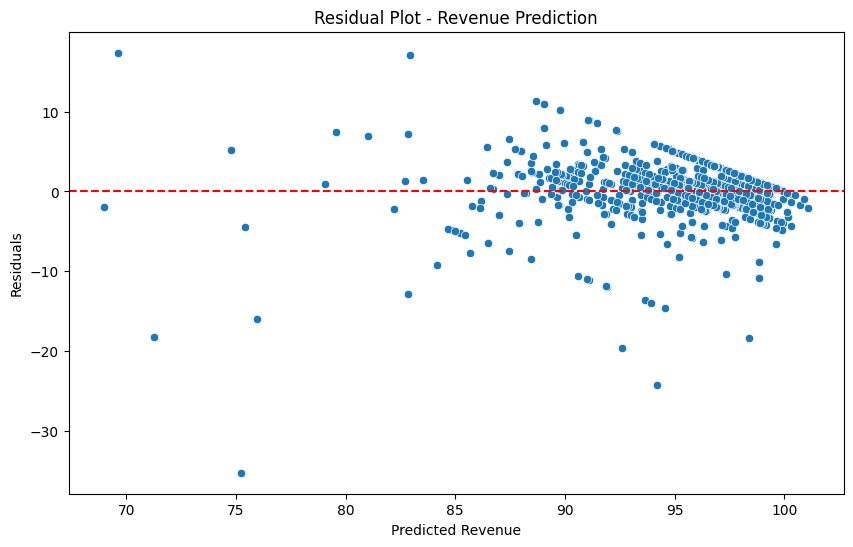

In [139]:
y_true = y_test.squeeze()

residuals = y_true - y_pred.flatten()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred.flatten(), y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.title("Residual Plot - Revenue Prediction")
plt.show()

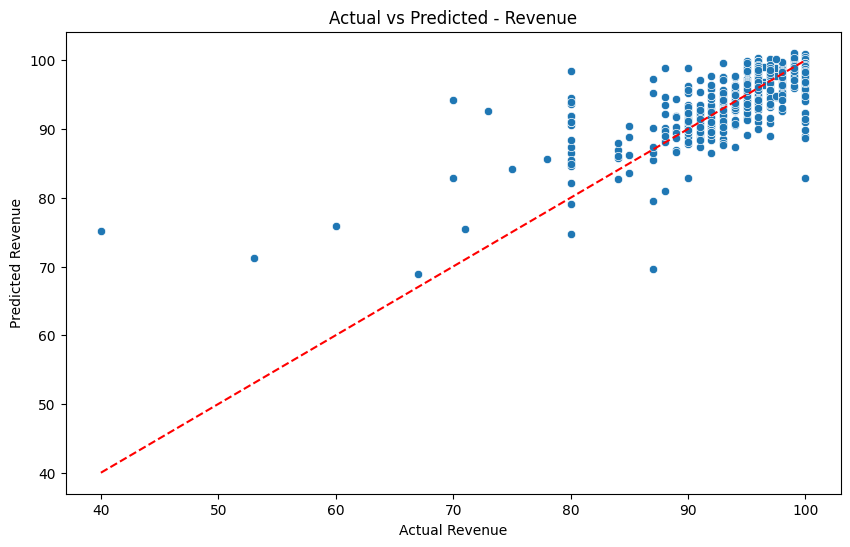

In [140]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_true, y=y_pred.flatten())
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
         '--', color='red')
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted - Revenue")
plt.show()

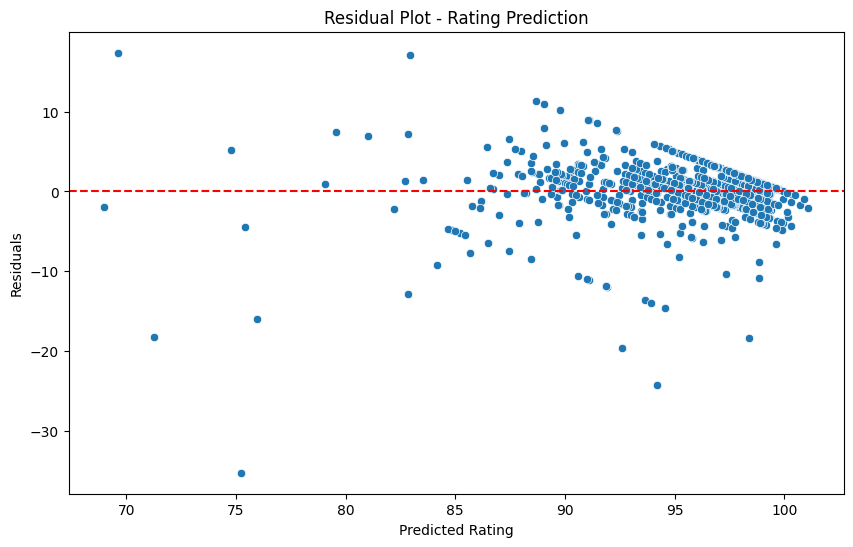

In [135]:
residuals_rating = y_test['review_scores_rating'] - y_pred.flatten()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred.flatten(), y=residuals_rating)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Rating")
plt.ylabel("Residuals")
plt.title("Residual Plot - Rating Prediction")
plt.show()

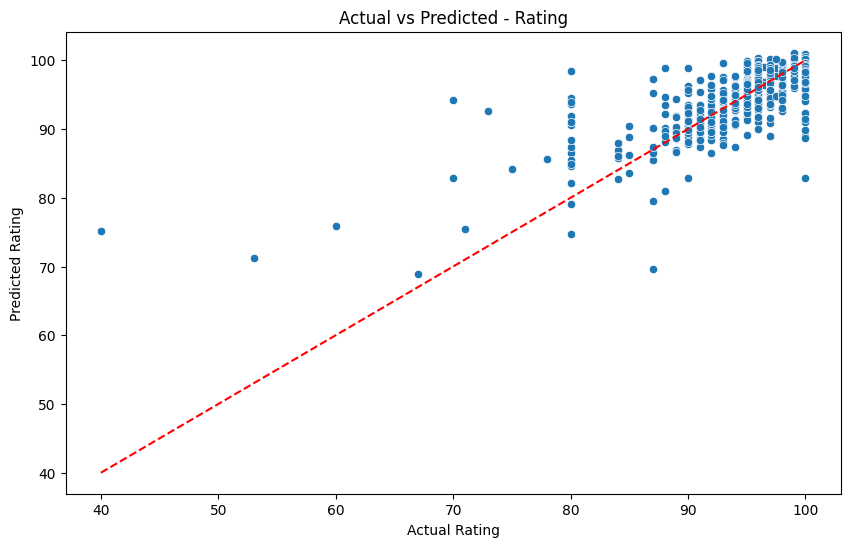

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test['review_scores_rating'], y=y_pred.flatten())
plt.plot([y_test['review_scores_rating'].min(), y_test['review_scores_rating'].max()],
         [y_test['review_scores_rating'].min(), y_test['review_scores_rating'].max()],
         '--', color='red')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted - Rating")
plt.show()